# 3. Feature Extraction, Transformations and Cleansing:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
%matplotlib inline
matplotlib.style.use("ggplot")

## 3.1. Data Quality: nans, wrong data, etc.

### Cargamos el fichero y lo examinamos:

In [2]:
matches_2016 = pd.read_csv('../tennis_atp-master/atp_matches_2016.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
matches_2016.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,2016-M020,Brisbane,Hard,32,A,20160104,300,105683,4.0,NaN,Milos Raonic,R,196.0,CAN,25.021218,14.0,2170.0,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,6-4 6-4,3,F,87.0,6.0,6.0,60.0,34.0,28.0,14.0,10.0,1.0,1.0,7.0,3.0,61.0,34.0,25.0,14.0,10.0,3.0,5.0
1,2016-M020,Brisbane,Hard,32,A,20160104,299,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,6-1 6-4,3,SF,60.0,6.0,0.0,49.0,27.0,23.0,12.0,9.0,0.0,1.0,2.0,4.0,55.0,31.0,18.0,9.0,8.0,2.0,6.0
2,2016-M020,Brisbane,Hard,32,A,20160104,298,105683,4.0,NaN,Milos Raonic,R,196.0,CAN,25.021218,14.0,2170.0,106071,7.0,NaN,Bernard Tomic,R,193.0,AUS,23.203285,18.0,1675.0,7-6(5) 7-6(5),3,SF,107.0,13.0,3.0,79.0,49.0,40.0,19.0,12.0,4.0,4.0,10.0,3.0,84.0,54.0,41.0,16.0,12.0,2.0,2.0
3,2016-M020,Brisbane,Hard,32,A,20160104,297,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,105777,NaN,NaN,Grigor Dimitrov,R,188.0,BUL,24.637919,28.0,1360.0,6-4 6-7(4) 6-4,3,QF,127.0,7.0,1.0,83.0,52.0,45.0,19.0,16.0,0.0,1.0,8.0,2.0,104.0,62.0,46.0,21.0,16.0,8.0,11.0
4,2016-M020,Brisbane,Hard,32,A,20160104,296,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,105227,3.0,NaN,Marin Cilic,R,198.0,CRO,27.266256,13.0,2405.0,2-6 7-6(4) 6-4,3,QF,119.0,6.0,0.0,84.0,55.0,41.0,20.0,15.0,0.0,2.0,11.0,2.0,98.0,52.0,41.0,27.0,15.0,7.0,8.0


In [5]:
matches_2016.tail()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
2936,2016-M-DC-2016-WG-PO-KAZ-RUS-01,Davis Cup WG PO: KAZ vs RUS,Hard,4,D,20160916,4,105723,NaN,NaN,Andrey Kuznetsov,R,185.0,RUS,25.555099,47.0,998.0,105062,NaN,NaN,Mikhail Kukushkin,R,183.0,KAZ,28.714579,80.0,679.0,6-1 6-2 6-2,5,RR,101.0,9.0,3.0,61.0,39.0,36.0,13.0,12.0,1.0,1.0,2.0,2.0,87.0,60.0,34.0,8.0,11.0,7.0,13.0
2937,2016-M-DC-2016-WG-PO-SUI-UZB-01,Davis Cup WG PO: SUI vs UZB,Clay,4,D,20160916,1,104797,NaN,NaN,Denis Istomin,R,188.0,UZB,30.015058,113.0,550.0,134472,NaN,NaN,Antoine Bellier,U,NaN,SUI,19.901437,507.0,72.0,6-3 6-2 6-4,5,RR,30.0,9.0,0.0,74.0,50.0,39.0,18.0,14.0,1.0,1.0,4.0,3.0,88.0,53.0,35.0,14.0,13.0,4.0,8.0
2938,2016-M-DC-2016-WG-PO-SUI-UZB-01,Davis Cup WG PO: SUI vs UZB,Clay,4,D,20160916,2,105967,NaN,NaN,Henri Laaksonen,R,NaN,SUI,24.451745,138.0,433.0,122109,NaN,NaN,Sanjar Fayziev,U,NaN,UZB,22.124572,634.0,42.0,6-2 6-2 6-2,3,RR,113.0,7.0,8.0,76.0,45.0,37.0,18.0,12.0,3.0,3.0,3.0,1.0,107.0,73.0,36.0,18.0,12.0,10.0,16.0
2939,2016-M-DC-2016-WG-PO-SUI-UZB-01,Davis Cup WG PO: SUI vs UZB,Clay,4,D,20160916,4,104797,NaN,NaN,Denis Istomin,R,188.0,UZB,30.015058,113.0,550.0,105967,NaN,NaN,Henri Laaksonen,R,NaN,SUI,24.451745,138.0,433.0,6-7(3) 7-6(6) 7-6(6) 7-5,5,RR,248.0,7.0,3.0,160.0,88.0,62.0,42.0,24.0,4.0,8.0,3.0,6.0,169.0,103.0,70.0,34.0,24.0,2.0,7.0
2940,2016-M-DC-2016-WG-PO-SUI-UZB-01,Davis Cup WG PO: SUI vs UZB,Clay,4,D,20160916,5,134472,NaN,NaN,Antoine Bellier,U,NaN,SUI,19.901437,507.0,72.0,127300,NaN,NaN,Djurabek Karimov,U,NaN,UZB,18.275154,769.0,26.0,6-2 6-4 6-7(6) 6-3,5,RR,195.0,4.0,5.0,142.0,86.0,60.0,25.0,20.0,4.0,8.0,8.0,3.0,114.0,63.0,39.0,26.0,19.0,6.0,14.0


In [6]:
matches_2016.columns

Index([u'tourney_id', u'tourney_name', u'surface', u'draw_size',
       u'tourney_level', u'tourney_date', u'match_num', u'winner_id',
       u'winner_seed', u'winner_entry', u'winner_name', u'winner_hand',
       u'winner_ht', u'winner_ioc', u'winner_age', u'winner_rank',
       u'winner_rank_points', u'loser_id', u'loser_seed', u'loser_entry',
       u'loser_name', u'loser_hand', u'loser_ht', u'loser_ioc', u'loser_age',
       u'loser_rank', u'loser_rank_points', u'score', u'best_of', u'round',
       u'minutes', u'w_ace', u'w_df', u'w_svpt', u'w_1stIn', u'w_1stWon',
       u'w_2ndWon', u'w_SvGms', u'w_bpSaved', u'w_bpFaced', u'l_ace', u'l_df',
       u'l_svpt', u'l_1stIn', u'l_1stWon', u'l_2ndWon', u'l_SvGms',
       u'l_bpSaved', u'l_bpFaced'],
      dtype='object')

In [7]:
matches_2016.shape

(2941, 49)

In [8]:
matches_2016.groupby('tourney_name').count()

,tourney_id,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
tourney_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Acapulco,31,31,31,31,31,31,31,13,3,31,31,24,31,31,31,31,31,7,7,31,31,25,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
Antwerp,27,27,27,27,27,27,27,8,4,27,27,15,27,27,27,27,27,7,7,27,27,18,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
Atlanta,27,27,27,27,27,27,27,13,6,27,27,13,27,27,27,27,27,7,10,27,27,16,27,26,26,26,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
Auckland,27,27,27,27,27,27,27,14,3,27,27,21,27,27,27,27,27,7,6,27,27,22,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
Australian Open,127,127,127,127,127,127,127,82,0,127,127,107,127,127,127,127,127,31,0,127,127,93,127,127,125,125,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127
Barcelona,47,47,47,47,47,47,47,25,7,47,47,40,47,47,47,47,47,13,11,47,47,31,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47
Basel,31,31,31,31,31,31,31,13,7,31,31,29,31,31,31,31,31,7,7,31,31,27,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
Bastad,27,27,27,27,27,27,27,13,2,27,27,18,27,27,27,27,27,7,7,27,27,11,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
Beijing,31,31,31,31,31,31,31,16,3,31,31,23,31,31,31,31,31,7,7,31,31,23,31,31,31,31,31,31,31,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30


#### El data set contiene 49 features de origen y 2941 partidos, divididos entre 133 torneos. Los torneos de copa Davies apenas tienen partidos y no son competiciones individuales por tanto no los vamos a utilizar en nuestros modelos.

In [9]:
matches_2016.isnull().sum()

tourney_id               0
tourney_name             0
surface                  0
draw_size                0
tourney_level            0
tourney_date             0
match_num                0
winner_id                0
winner_seed           1582
winner_entry          2641
winner_name              0
winner_hand              2
winner_ht              762
winner_ioc               0
winner_age               6
winner_rank             16
winner_rank_points      16
loser_id                 0
loser_seed            2227
loser_entry           2414
loser_name               0
loser_hand              12
loser_ht               940
loser_ioc                0
loser_age                6
loser_rank              46
loser_rank_points       46
score                    0
best_of                  0
round                    0
minutes                 22
w_ace                   26
w_df                    26
w_svpt                  26
w_1stIn                 26
w_1stWon                26
w_2ndWon                26
w

#### There are some features with nan's. We can divide into three different groups:
    1. Data is correct: Winner seed nad winner entry don't need to have data in every row, just in case this match is seeded or one of the players have a entry level (look terms in glosary).
    2. Data is not correct but easy to fill: *_hand, *_age, *_rank, *_rank_points.
    3. Data in not correct but difficult to obtain: *match features, *_ht(many of them)

In [10]:
matches_2016[matches_2016['loser_hand'].isnull()].head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
2690,2016-M-DC-2016-G1-AM-M-BAR-ECU-01,Davis Cup G1 R1: BAR vs ECU,Clay,4,D,20160304,1,105877,NaN,NaN,Emilio Gomez,R,NaN,ECU,24.254620,327.0,143.0,200618,NaN,NaN,Adam Hornby,NaN,NaN,BAR,NaN,NaN,NaN,6-0 6-0 6-0,5,RR,78.0,2.0,2.0,55.0,34.0,29.0,10.0,9.0,2.0,2.0,2.0,5.0,53.0,36.0,11.0,4.0,9.0,7.0,16.0
2693,2016-M-DC-2016-G1-AM-M-BAR-ECU-01,Davis Cup G1 R1: BAR vs ECU,Clay,4,D,20160304,5,105111,NaN,NaN,Ivan Endara,U,NaN,ECU,27.989049,395.0,108.0,200618,NaN,NaN,Adam Hornby,NaN,NaN,BAR,NaN,NaN,NaN,6-0 6-1,3,RR,48.0,3.0,0.0,39.0,22.0,17.0,11.0,7.0,0.0,0.0,0.0,3.0,32.0,20.0,7.0,3.0,6.0,1.0,6.0
2700,2016-M-DC-2016-G1-AM-M-CHI-DOM-01,Davis Cup G1 R1: CHI vs DOM,Clay,4,D,20160304,1,105070,NaN,NaN,Hans Podlipnik Castillo,R,NaN,CHI,28.139630,198.0,267.0,144773,NaN,NaN,Jose Olivares,NaN,NaN,DOM,19.140315,1250.0,6.0,6-1 6-1 7-6(4),5,RR,128.0,0.0,2.0,86.0,55.0,47.0,15.0,13.0,2.0,3.0,3.0,4.0,95.0,64.0,37.0,14.0,13.0,10.0,16.0
2703,2016-M-DC-2016-G1-AM-M-CHI-DOM-01,Davis Cup G1 R1: CHI vs DOM,Clay,4,D,20160304,5,106174,NaN,NaN,Gonzalo Lama,R,NaN,CHI,22.841889,263.0,199.0,144773,NaN,NaN,Jose Olivares,NaN,NaN,DOM,19.140315,1250.0,6.0,6-4 6-0,3,RR,58.0,1.0,0.0,47.0,32.0,24.0,11.0,8.0,4.0,4.0,1.0,0.0,51.0,34.0,17.0,9.0,8.0,2.0,6.0
2757,2016-M-DC-2016-G2-AM-M-PAR-VEN-01,Davis Cup G2 R1: PAR vs VEN,Hard,4,D,20160304,1,106175,NaN,NaN,Ricardo Rodriguez,R,NaN,VEN,22.839151,449.0,91.0,200621,NaN,NaN,Bruno Britez,NaN,NaN,PAR,17.771389,NaN,NaN,6-7(8) 7-5 6-1 7-5,5,RR,194.0,10.0,9.0,134.0,85.0,66.0,27.0,22.0,1.0,3.0,2.0,9.0,138.0,85.0,58.0,26.0,21.0,5.0,11.0


In [11]:
matches_2016[matches_2016['winner_hand'].isnull()].head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
2769,2016-M-DC-2016-G2-AM-M-PUR-ESA-01,Davis Cup G2 R1: PUR vs ESA,Hard,4,D,20160304,1,200619,NaN,NaN,Sebastian Arcila,NaN,NaN,PUR,NaN,NaN,NaN,108763,NaN,NaN,Alberto Emmanuel Alvarado Larin,U,NaN,ESA,21.245722,NaN,NaN,6-4 6-4 6-2,3,RR,108.0,0.0,3.0,80.0,61.0,44.0,11.0,14.0,4.0,6.0,1.0,7.0,107.0,67.0,36.0,20.0,14.0,7.0,13.0
2772,2016-M-DC-2016-G2-AM-M-PUR-ESA-01,Davis Cup G2 R1: PUR vs ESA,Hard,4,D,20160304,5,200620,NaN,NaN,Ignacio Garcia,NaN,NaN,PUR,NaN,NaN,NaN,144771,NaN,NaN,Sebastian Quiros,NaN,NaN,ESA,17.949350,1774.0,1.0,6-1 6-2,3,RR,62.0,2.0,4.0,50.0,25.0,17.0,18.0,8.0,5.0,5.0,4.0,4.0,52.0,26.0,17.0,5.0,7.0,5.0,10.0


Comprobado, la Copa Davis a parte de no ser un torneo individual, tiene problemas en los datos.

#### El campo que describe el tipo de torneo es tourney_level, y la copa Davies se defines como D:

In [12]:
matches_2016.groupby('tourney_level').count()

,tourney_id,tourney_name,surface,draw_size,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
tourney_level,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,1615,1615,1615,1615,1615,1615,1615,759,225,1615,1615,1199,1615,1615,1614,1614,1615,427,399,1615,1615,1132,1615,1614,1609,1609,1615,1615,1615,1606,1602,1602,1602,1602,1602,1602,1602,1602,1602,1602,1602,1602,1602,1602,1602,1602,1602,1602
D,251,251,251,251,251,251,251,0,0,251,249,107,251,245,236,236,251,0,0,251,239,72,251,246,213,213,251,251,251,241,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246
G,508,508,508,508,508,508,508,303,0,508,508,411,508,508,508,508,508,124,0,508,508,372,508,508,506,506,508,508,508,506,505,505,505,505,505,505,505,505,505,505,505,505,505,505,505,505,505,505
M,567,567,567,567,567,567,567,297,75,567,567,462,567,567,567,567,567,163,128,567,567,425,567,567,567,567,567,567,567,566,562,562,562,562,562,562,562,562,562,562,562,562,562,562,562,562,562,562


#### Generamos un nuevo dataset sin compa Davies

In [13]:
matches_2016sD = matches_2016[matches_2016['tourney_level'] != 'D']
matches_2016sD.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,2016-M020,Brisbane,Hard,32,A,20160104,300,105683,4.0,NaN,Milos Raonic,R,196.0,CAN,25.021218,14.0,2170.0,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,6-4 6-4,3,F,87.0,6.0,6.0,60.0,34.0,28.0,14.0,10.0,1.0,1.0,7.0,3.0,61.0,34.0,25.0,14.0,10.0,3.0,5.0
1,2016-M020,Brisbane,Hard,32,A,20160104,299,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,6-1 6-4,3,SF,60.0,6.0,0.0,49.0,27.0,23.0,12.0,9.0,0.0,1.0,2.0,4.0,55.0,31.0,18.0,9.0,8.0,2.0,6.0
2,2016-M020,Brisbane,Hard,32,A,20160104,298,105683,4.0,NaN,Milos Raonic,R,196.0,CAN,25.021218,14.0,2170.0,106071,7.0,NaN,Bernard Tomic,R,193.0,AUS,23.203285,18.0,1675.0,7-6(5) 7-6(5),3,SF,107.0,13.0,3.0,79.0,49.0,40.0,19.0,12.0,4.0,4.0,10.0,3.0,84.0,54.0,41.0,16.0,12.0,2.0,2.0
3,2016-M020,Brisbane,Hard,32,A,20160104,297,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,105777,NaN,NaN,Grigor Dimitrov,R,188.0,BUL,24.637919,28.0,1360.0,6-4 6-7(4) 6-4,3,QF,127.0,7.0,1.0,83.0,52.0,45.0,19.0,16.0,0.0,1.0,8.0,2.0,104.0,62.0,46.0,21.0,16.0,8.0,11.0
4,2016-M020,Brisbane,Hard,32,A,20160104,296,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,105227,3.0,NaN,Marin Cilic,R,198.0,CRO,27.266256,13.0,2405.0,2-6 7-6(4) 6-4,3,QF,119.0,6.0,0.0,84.0,55.0,41.0,20.0,15.0,0.0,2.0,11.0,2.0,98.0,52.0,41.0,27.0,15.0,7.0,8.0


In [14]:
matches_2016sD.shape

(2690, 49)

In [15]:
matches_2016sD.isnull().sum()

tourney_id               0
tourney_name             0
surface                  0
draw_size                0
tourney_level            0
tourney_date             0
match_num                0
winner_id                0
winner_seed           1331
winner_entry          2390
winner_name              0
winner_hand              0
winner_ht              618
winner_ioc               0
winner_age               0
winner_rank              1
winner_rank_points       1
loser_id                 0
loser_seed            1976
loser_entry           2163
loser_name               0
loser_hand               0
loser_ht               761
loser_ioc                0
loser_age                1
loser_rank               8
loser_rank_points        8
score                    0
best_of                  0
round                    0
minutes                 12
w_ace                   21
w_df                    21
w_svpt                  21
w_1stIn                 21
w_1stWon                21
w_2ndWon                21
w

#### Vamos a inspeccionar los Nans de las estadísticas de partido:

In [16]:
matches_2016sD[matches_2016sD['w_ace'].isnull()].head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
293,2016-7161,Quito,Clay,32,A,20160201,300,103607,5.0,NaN,Victor Estrella,R,173.0,DOM,35.498973,58.0,797.0,105064,3.0,NaN,Thomaz Bellucci,L,188.0,BRA,28.090349,35.0,1140.0,4-6 7-6(5) 6-2,3,F,122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327,2016-7434,Sofia,Hard,32,A,20160201,293,105138,1.0,NaN,Roberto Bautista Agut,R,NaN,ESP,27.800137,18.0,1775.0,105936,NaN,NaN,Filip Krajinovic,R,185.0,SRB,23.928816,101.0,574.0,W/O,3,R16,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
493,2016-M052,Rio de Janeiro,Clay,32,A,20160215,297,104745,1.0,NaN,Rafael Nadal,L,185.0,ESP,29.702943,5.0,4880.0,105238,NaN,NaN,Alexandr Dolgopolov,R,180.0,UKR,27.271732,33.0,1195.0,W/O,3,QF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644,2016-M006,Indian Wells Masters,Hard,128,M,20160307,285,105138,14.0,NaN,Roberto Bautista Agut,R,NaN,ESP,27.895962,17.0,1935.0,104022,NaN,NaN,Mikhail Youzhny,R,183.0,RUS,33.700205,76.0,700.0,W/O,3,R64,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
743,2016-M007,Miami Masters,Hard,128,M,20160321,262,104607,7.0,NaN,Tomas Berdych,R,196.0,CZE,30.507871,7.0,3810.0,104330,NaN,NaN,Rajeev Ram,R,193.0,USA,32.008214,61.0,789.0,W/O,3,R64,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Encuentro algunos errores en los datos que habrá que revisar:
    1. score: Hay variables catalogadas W/O (Walkover). En estos partidos uno de los dos contendientes no se presento.
       https://es.wikipedia.org/wiki/Walkover 
       Tambien hay variables catalogadas como RET (Retired)
    2. minutes: Hay variables con 0.0

In [17]:
matches_2016sD.groupby('score').count()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
score,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0-6 6-3 6-2,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0-6 6-3 7-6(3),1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0-6 6-4 6-1 1-6 6-0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0-6 6-4 7-6(2),1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0-6 6-4 7-6(8),1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1-2 RET,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1-6 6-0 6-1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1-6 6-0 7-5,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1-6 6-2 7-6(4),1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


#### Ademas de los marcadores en score nos encontramos W/O (19) y RET (Retired, 3)

In [18]:
matches_2016sD[matches_2016sD['score'] == 'W/O'].sample(5)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
743,2016-M007,Miami Masters,Hard,128,M,20160321,262,104607,7.0,NaN,Tomas Berdych,R,196.0,CZE,30.507871,7.0,3810.0,104330,NaN,NaN,Rajeev Ram,R,193.0,USA,32.008214,61.0,789.0,W/O,3,R64,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1328,2016-520,Roland Garros,Clay,128,G,20160523,200,104719,NaN,NaN,Marcel Granollers,R,190.0,ESP,30.113621,56.0,844.0,104745,4.0,NaN,Rafael Nadal,L,185.0,ESP,29.971253,5.0,5675.0,W/O,5,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2370,2016-M015,Beijing,Hard,32,A,20161003,298,105777,NaN,NaN,Grigor Dimitrov,R,188.0,BUL,25.385352,20.0,1735.0,105683,3.0,NaN,Milos Raonic,R,196.0,CAN,25.768652,6.0,4510.0,W/O,3,SF,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1448,2016-0311,London,Grass,32,A,20160613,292,106378,NaN,WC,Kyle Edmund,R,NaN,GBR,21.429158,85.0,676.0,103908,NaN,NaN,Paul Henri Mathieu,R,185.0,FRA,34.417522,61.0,820.0,W/O,3,R16,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
493,2016-M052,Rio de Janeiro,Clay,32,A,20160215,297,104745,1.0,NaN,Rafael Nadal,L,185.0,ESP,29.702943,5.0,4880.0,105238,NaN,NaN,Alexandr Dolgopolov,R,180.0,UKR,27.271732,33.0,1195.0,W/O,3,QF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Evidentemente los partidos catalogados como W/O no contien estadisticas del partido por tanto hay que eliminarlos

In [19]:
matches_2016sDWO = matches_2016sD[matches_2016sD['score'] != 'W/O']
matches_2016sDWO.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,2016-M020,Brisbane,Hard,32,A,20160104,300,105683,4.0,NaN,Milos Raonic,R,196.0,CAN,25.021218,14.0,2170.0,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,6-4 6-4,3,F,87.0,6.0,6.0,60.0,34.0,28.0,14.0,10.0,1.0,1.0,7.0,3.0,61.0,34.0,25.0,14.0,10.0,3.0,5.0
1,2016-M020,Brisbane,Hard,32,A,20160104,299,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,6-1 6-4,3,SF,60.0,6.0,0.0,49.0,27.0,23.0,12.0,9.0,0.0,1.0,2.0,4.0,55.0,31.0,18.0,9.0,8.0,2.0,6.0
2,2016-M020,Brisbane,Hard,32,A,20160104,298,105683,4.0,NaN,Milos Raonic,R,196.0,CAN,25.021218,14.0,2170.0,106071,7.0,NaN,Bernard Tomic,R,193.0,AUS,23.203285,18.0,1675.0,7-6(5) 7-6(5),3,SF,107.0,13.0,3.0,79.0,49.0,40.0,19.0,12.0,4.0,4.0,10.0,3.0,84.0,54.0,41.0,16.0,12.0,2.0,2.0
3,2016-M020,Brisbane,Hard,32,A,20160104,297,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,105777,NaN,NaN,Grigor Dimitrov,R,188.0,BUL,24.637919,28.0,1360.0,6-4 6-7(4) 6-4,3,QF,127.0,7.0,1.0,83.0,52.0,45.0,19.0,16.0,0.0,1.0,8.0,2.0,104.0,62.0,46.0,21.0,16.0,8.0,11.0
4,2016-M020,Brisbane,Hard,32,A,20160104,296,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,105227,3.0,NaN,Marin Cilic,R,198.0,CRO,27.266256,13.0,2405.0,2-6 7-6(4) 6-4,3,QF,119.0,6.0,0.0,84.0,55.0,41.0,20.0,15.0,0.0,2.0,11.0,2.0,98.0,52.0,41.0,27.0,15.0,7.0,8.0


In [20]:
matches_2016sDWO.shape

(2671, 49)

#### Ahora vamos a revisar los partidos con minutes = 0.0

In [21]:
matches_2016sDWO[matches_2016sDWO['minutes'] < 30.0 ].head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
85,2016-0301,Auckland,Hard,32,A,20160111,300,105138,8.0,NaN,Roberto Bautista Agut,R,NaN,ESP,27.742642,25.0,1480.0,106058,NaN,NaN,Jack Sock,R,185.0,USA,23.296372,26.0,1465.0,6-1 1-0 RET,3,F,28.0,2.0,2.0,21.0,15.0,14.0,2.0,4.0,0.0,0.0,0.0,3.0,25.0,10.0,5.0,5.0,4.0,1.0,4.0
1167,2016-M009,Rome Masters,Clay,64,M,20160509,247,105332,NaN,NaN,Benoit Paire,R,196.0,FRA,27.003422,21.0,1686.0,106071,NaN,NaN,Bernard Tomic,R,193.0,AUS,23.548255,22.0,1625.0,1-2 RET,3,R64,8.0,1.0,0.0,4.0,3.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,12.0,10.0,8.0,1.0,2.0,1.0,1.0
1636,2016-540,Wimbledon,Grass,128,G,20160627,218,104542,12.0,NaN,Jo Wilfried Tsonga,R,188.0,FRA,31.195072,12.0,2725.0,104755,7.0,NaN,Richard Gasquet,R,185.0,FRA,30.026010,10.0,2905.0,4-2 RET,5,R16,23.0,2.0,0.0,23.0,14.0,12.0,4.0,3.0,1.0,1.0,0.0,0.0,14.0,8.0,7.0,3.0,3.0,2.0,3.0
1749,2016-0314,Gstaad,Clay,32,A,20160718,279,105806,NaN,NaN,Mirza Basic,R,NaN,BIH,25.018480,139.0,418.0,104797,NaN,NaN,Denis Istomin,R,188.0,UZB,29.861739,97.0,611.0,4-2 RET,3,R32,25.0,2.0,1.0,17.0,8.0,7.0,6.0,3.0,0.0,0.0,3.0,0.0,32.0,18.0,13.0,4.0,3.0,5.0,6.0
1885,2016-0421,Canada Masters,Hard,64,M,20160725,273,104731,NaN,NaN,Kevin Anderson,R,203.0,RSA,30.187543,34.0,1335.0,106233,6.0,NaN,Dominic Thiem,R,NaN,AUT,22.891170,9.0,3105.0,4-1 RET,3,R32,20.0,6.0,0.0,14.0,8.0,8.0,4.0,3.0,0.0,0.0,1.0,2.0,16.0,9.0,6.0,2.0,2.0,2.0,3.0


#### Parece que al quitar los partdios con score W/O también hemos quitado los partidos con minutes 0.0
#### Los partidos con calificacion RET tienen unas estadisticas muy particulares. Deberiamos crear una variable categorica en la que si el partido se completo fuera 1 y si no termino (RET) haya un 0. Mas adelante analizaremos su uso

In [22]:
matches_2016sDWO.isnull().sum()

tourney_id               0
tourney_name             0
surface                  0
draw_size                0
tourney_level            0
tourney_date             0
match_num                0
winner_id                0
winner_seed           1325
winner_entry          2374
winner_name              0
winner_hand              0
winner_ht              609
winner_ioc               0
winner_age               0
winner_rank              1
winner_rank_points       1
loser_id                 0
loser_seed            1965
loser_entry           2146
loser_name               0
loser_hand               0
loser_ht               760
loser_ioc                0
loser_age                1
loser_rank               8
loser_rank_points        8
score                    0
best_of                  0
round                    0
minutes                  8
w_ace                    2
w_df                     2
w_svpt                   2
w_1stIn                  2
w_1stWon                 2
w_2ndWon                 2
w

#### Aun hay 8 partidos a los que les fata información pual:

In [23]:
matches_2016sDWO[matches_2016sDWO['loser_rank'].isnull()].head(8)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
186,2016-580,Australian Open,Hard,128,G,20160118,147,104527,4.0,NaN,Stanislas Wawrinka,R,183.0,SUI,30.809035,4.0,6865.0,104098,NaN,NaN,Dmitry Tursunov,R,185.0,RUS,33.100616,NaN,NaN,7-6 6-3,5,R128,94.0,14.0,0.0,60.0,37.0,33.0,15.0,11.0,1.0,1.0,2.0,2.0,88.0,55.0,34.0,20.0,11.0,8.0,9.0
196,2016-580,Australian Open,Hard,128,G,20160118,157,104620,NaN,NaN,Simone Bolelli,R,183.0,ITA,30.277892,64.0,765.0,104548,NaN,NaN,Brian Baker,R,190.0,USA,30.718686,NaN,NaN,7-6 7-6 6-7 7-6,5,R128,219.0,26.0,0.0,157.0,104.0,83.0,30.0,26.0,4.0,6.0,15.0,7.0,160.0,107.0,88.0,24.0,26.0,4.0,6.0
843,2016-0360,Marrakech,Clay,32,A,20160404,283,105254,NaN,Q,Nikola Mektic,U,NaN,CRO,27.277207,312.0,154.0,105149,NaN,WC,Reda El Amrani,R,185.0,MAR,27.876797,NaN,NaN,7-5 6-3,3,R32,110.0,8.0,2.0,69.0,42.0,34.0,13.0,10.0,5.0,6.0,5.0,10.0,107.0,62.0,40.0,18.0,11.0,14.0,18.0
1397,2016-0321,Stuttgart,Grass,32,A,20160606,284,126203,NaN,NaN,Taylor Harry Fritz,R,NaN,USA,18.606434,65.0,768.0,104802,NaN,Q,Fabrice Martin,R,NaN,FRA,29.735797,NaN,NaN,3-6 7-6(6) 6-1,3,R32,88.0,19.0,2.0,79.0,48.0,41.0,20.0,13.0,2.0,3.0,16.0,6.0,106.0,66.0,47.0,21.0,15.0,5.0,8.0
1685,2016-0414,Hamburg,Clay,32,A,20160711,287,105373,7.0,NaN,Martin Klizan,L,190.0,SVK,27.000684,47.0,943.0,144923,NaN,WC,Louis Wessels,R,NaN,GER,17.872690,NaN,NaN,6-1 6-1,3,R16,50.0,4.0,1.0,47.0,30.0,19.0,13.0,7.0,4.0,4.0,3.0,4.0,37.0,28.0,13.0,1.0,7.0,3.0,8.0
1696,2016-0414,Hamburg,Clay,32,A,20160711,276,104813,NaN,NaN,Grega Zemlja,R,183.0,SLO,29.782341,151.0,370.0,202359,NaN,WC,Marvin Moeller,U,NaN,GER,17.478439,NaN,NaN,6-1 6-2,3,R32,62.0,3.0,0.0,51.0,27.0,21.0,15.0,8.0,3.0,3.0,2.0,2.0,49.0,28.0,15.0,7.0,7.0,7.0,11.0
1930,2016-6116,Atlanta,Hard,32,A,20160801,282,126203,8.0,NaN,Taylor Harry Fritz,R,NaN,USA,18.759754,60.0,811.0,106269,NaN,WC,Austin Smith,U,NaN,USA,22.683094,NaN,NaN,6-2 6-2,3,R32,65.0,7.0,0.0,53.0,30.0,21.0,16.0,8.0,2.0,2.0,1.0,4.0,48.0,30.0,15.0,10.0,8.0,3.0,7.0
1982,2016-O16,Olympics,Hard,64,A,20160808,115,105676,8.0,NaN,David Goffin,R,163.0,BEL,25.670089,13.0,2655.0,103857,NaN,NaN,Igor Kunitsyn,R,180.0,RUS,34.855578,NaN,NaN,6-4 6-2,3,R64,80.0,2.0,4.0,61.0,43.0,33.0,7.0,9.0,4.0,5.0,9.0,2.0,55.0,31.0,21.0,9.0,9.0,3.0,7.0


#### Acabo de ver otro detalle de calidad en los datos. Si el partido es de best_of 3 or 5 y juegn menos de 3 o 5 sets es porque el 
#### loser se retiro, sin embargo no lo dice. 
    Mas adelante cuando separemos el score en sets, los que cumplan esta condicion habrá que añadirles Retired. De echo hay que marcar un feature categorico como RETIRED: 1 o 0
    Por tanto la separacion de sets va a suponer las siguientes tareas:
    1. Separar el resultado de los sets de 1 a 5 entre W y L
    2. Crear variable categorica Completed (1 Completed / 0 Retired)
    3. Completar variable categorica Completed con aquellos en los que sin poner RET no hayan finalizado
#### Ademas hay que sacar algunas features nuevas para completar las estadisticas de partido y poder hacer porcentajes:
        Totales para sacar porcentajes: 
        % w_1stIn = w_1stIn / w_svpt
        % w_1stWon = w_1stWon / w_1stIn
        % w_2ndWon = w_2ndWon / (w-svpt - w_1stIn)
        
        .
        % w_TotalReturnPointsWon = (l_1stIn - l_1stWon) + (l_svpt - l_1stIn - l_2ndWon) / l_svpt
        .
        w_TotalPointsWon = w_1stWon + w_2ndWon + (l_1stIn - l_1stWon) + (l_svpt - l_1stIn - l_2ndWon)
        Total_Points = w_svpt + l_svpt
        % w_TotalPointsWon = w_TotalPointsWon / Total_Points
        l_TotalPointsWon = l_1stWon + l_2ndWon + (w_1stIn - w_1stWon) + (w_svpt - w_1stIn - w_2ndWon)
        % l_TotalPointsWon = l_TotalPointsWon / Total_Points
        

#### En este caso podemos plantearnos arreglar la información. Solo faltan datos puntuales

In [24]:
matches_2016sDWO.groupby('tourney_name').count()

,tourney_id,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
tourney_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Acapulco,31,31,31,31,31,31,31,13,3,31,31,24,31,31,31,31,31,7,7,31,31,25,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
Antwerp,27,27,27,27,27,27,27,8,4,27,27,15,27,27,27,27,27,7,7,27,27,18,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
Atlanta,27,27,27,27,27,27,27,13,6,27,27,13,27,27,27,27,27,7,10,27,27,16,27,26,26,26,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
Auckland,27,27,27,27,27,27,27,14,3,27,27,21,27,27,27,27,27,7,6,27,27,22,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
Australian Open,127,127,127,127,127,127,127,82,0,127,127,107,127,127,127,127,127,31,0,127,127,93,127,127,125,125,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127
Barcelona,47,47,47,47,47,47,47,25,7,47,47,40,47,47,47,47,47,13,11,47,47,31,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47
Basel,31,31,31,31,31,31,31,13,7,31,31,29,31,31,31,31,31,7,7,31,31,27,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
Bastad,27,27,27,27,27,27,27,13,2,27,27,18,27,27,27,27,27,7,7,27,27,11,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
Beijing,30,30,30,30,30,30,30,16,3,30,30,22,30,30,30,30,30,6,7,30,30,22,30,30,30,30,30,30,30,29,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30


#### Después de revisar todos los datos llegamos a la conclusión de que tenemos que arreglar:
    1. *_ht
    2. Los datos que faltan de los 8 partidos de matches_2016sDWO

In [25]:
matches_2016sDWO[matches_2016sDWO['winner_ht'].isnull()].groupby('winner_name').sum()

,draw_size,tourney_date,match_num,winner_id,winner_seed,winner_ht,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_ht,loser_age,loser_rank,loser_rank_points,best_of,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
winner_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Adam Pavlasek,192,60481959,708,319083,NaN,NaN,65.177276,364.0,1464.0,315083,3.0,365.0,86.431211,294.0,1932.0,11,329.0,16.0,8.0,276.0,164.0,115.0,60.0,40.0,19.0,26.0,6.0,6.0,240.0,161.0,92.0,41.0,38.0,14.0,28.0
Alexander Bublik,64,40322034,577,244660,NaN,NaN,38.669405,532.0,388.0,209643,1.0,190.0,60.156057,92.0,3212.0,6,170.0,7.0,10.0,146.0,84.0,60.0,26.0,22.0,14.0,20.0,8.0,4.0,144.0,101.0,57.0,22.0,23.0,9.0,19.0
Alexander Sarkissian,32,20160111,276,105512,NaN,NaN,25.774127,195.0,260.0,104620,NaN,183.0,30.258727,58.0,790.0,3,94.0,8.0,1.0,62.0,29.0,22.0,23.0,10.0,2.0,3.0,5.0,0.0,77.0,49.0,29.0,15.0,10.0,4.0,7.0
Alexander Zverev,2560,887065961,11711,4428336,185.0,NaN,841.864476,1880.0,50136.0,4669518,95.0,6182.0,1257.289528,3511.0,61621.0,142,4808.0,290.0,168.0,3633.0,2273.0,1681.0,737.0,562.0,183.0,254.0,170.0,160.0,3571.0,2097.0,1423.0,695.0,557.0,188.0,356.0
Alexandre Sidorenko,32,20160919,277,105098,NaN,NaN,28.585900,255.0,205.0,105077,6.0,188.0,28.673511,32.0,1340.0,3,83.0,3.0,4.0,61.0,39.0,27.0,12.0,10.0,3.0,5.0,4.0,5.0,64.0,35.0,22.0,11.0,10.0,8.0,13.0
Andrea Arnaboldi,64,40321422,569,210126,NaN,NaN,57.078713,460.0,470.0,211016,8.0,185.0,52.616016,206.0,1161.0,6,200.0,5.0,6.0,157.0,91.0,63.0,36.0,23.0,6.0,10.0,7.0,9.0,141.0,77.0,49.0,32.0,21.0,17.0,24.0
Andrew Whittington,32,20160926,275,106225,NaN,NaN,23.126626,190.0,295.0,104563,NaN,NaN,31.312799,172.0,334.0,3,140.0,9.0,6.0,85.0,51.0,41.0,17.0,14.0,2.0,5.0,10.0,3.0,98.0,63.0,45.0,17.0,14.0,6.0,9.0
Andrey Rublev,64,40321023,563,252188,NaN,NaN,37.122519,386.0,554.0,209562,NaN,363.0,59.622177,256.0,963.0,6,162.0,7.0,5.0,120.0,71.0,52.0,30.0,21.0,6.0,9.0,9.0,4.0,135.0,81.0,52.0,22.0,20.0,7.0,14.0
Ante Pavic,32,20160104,283,105302,NaN,NaN,26.828200,449.0,90.0,104597,NaN,183.0,30.370979,73.0,694.0,3,124.0,12.0,2.0,96.0,54.0,44.0,26.0,16.0,3.0,4.0,17.0,1.0,99.0,44.0,34.0,37.0,17.0,3.0,4.0


In [26]:
matches_2016sDWO[matches_2016sDWO['loser_ht'].isnull()].groupby('loser_name').sum()

,draw_size,tourney_date,match_num,winner_id,winner_seed,winner_ht,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_ht,loser_age,loser_rank,loser_rank_points,best_of,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
loser_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Adam Pavlasek,192,60482258,753,316795,30.0,371.0,78.121834,260.0,2334.0,319083,NaN,NaN,65.426420,337.0,1615.0,11,287.0,17.0,7.0,238.0,155.0,124.0,49.0,41.0,5.0,8.0,20.0,12.0,266.0,163.0,116.0,47.0,41.0,13.0,23.0
Agustin Velotti,32,20160718,273,104547,NaN,188.0,31.225188,73.0,726.0,106006,NaN,NaN,24.150582,253.0,206.0,3,83.0,8.0,2.0,64.0,44.0,33.0,8.0,9.0,9.0,10.0,1.0,3.0,63.0,35.0,22.0,10.0,9.0,5.0,9.0
Akira Santillan,64,40321644,561,210964,8.0,NaN,53.054073,163.0,1346.0,234722,NaN,NaN,38.505133,527.0,393.0,6,130.0,11.0,7.0,106.0,58.0,53.0,28.0,18.0,6.0,6.0,6.0,4.0,112.0,61.0,39.0,26.0,18.0,6.0,12.0
Alejandro Gonzalez,224,60481247,745,317100,12.0,381.0,75.816564,230.0,2914.0,315876,NaN,NaN,81.557837,464.0,1125.0,9,394.0,20.0,17.0,272.0,148.0,109.0,63.0,42.0,8.0,16.0,11.0,8.0,286.0,166.0,100.0,62.0,42.0,18.0,31.0
Alexander Bublik,64,40321936,569,212228,6.0,NaN,45.872690,180.0,1568.0,244660,NaN,NaN,38.592745,589.0,342.0,6,178.0,5.0,2.0,150.0,97.0,64.0,27.0,23.0,7.0,13.0,9.0,9.0,145.0,83.0,60.0,16.0,23.0,9.0,18.0
Alexander Lazov,32,20160201,277,105373,7.0,190.0,26.559890,44.0,920.0,105586,NaN,NaN,25.566051,438.0,95.0,3,59.0,2.0,3.0,37.0,17.0,15.0,11.0,7.0,1.0,2.0,1.0,2.0,54.0,36.0,20.0,1.0,8.0,5.0,11.0
Alexander Sarkissian,160,40320418,516,210595,8.0,363.0,53.905544,110.0,1846.0,211024,NaN,NaN,51.701574,371.0,571.0,6,136.0,14.0,4.0,96.0,61.0,49.0,19.0,17.0,3.0,5.0,9.0,5.0,130.0,78.0,44.0,22.0,17.0,11.0,20.0
Alexander Ward,192,40321247,356,210109,11.0,348.0,57.286790,303.0,2948.0,211056,NaN,NaN,52.301164,489.0,430.0,8,219.0,19.0,4.0,160.0,101.0,88.0,32.0,29.0,4.0,5.0,10.0,8.0,204.0,125.0,85.0,31.0,28.0,18.0,27.0
Alexander Zverev,1504,443532240,5933,2308605,96.0,3179.0,640.766598,937.0,52435.0,2214168,82.0,NaN,420.328542,956.0,25051.0,74,2799.0,118.0,62.0,1964.0,1204.0,886.0,420.0,308.0,102.0,148.0,129.0,127.0,1988.0,1188.0,802.0,352.0,301.0,106.0,204.0


#### Hay 80 (winner) + 146 (loser) jugadores que no tienen altura. Hay que valorar el tiempo que invertiría para arreglarlos. Si no, 
#### tendría que prescindir o de los partidos o de la feature. Voy a ver cuantos coinciden

In [27]:
#### https://www.atpworldtour.com/es/

In [28]:
# Adam Pavlasek = 185
# Agustin Velotti = NaN
# Akira Santillan = 180
# Alejandro Gonazalez = 191
# Alexander Bublik = 196
# Alexander Lazov = 183
# Alexander Sarkissian = 191
# Alexander Ward = 185
# Alexander Zverev = 198
# Alexandre Sidorenko = 185
# Andrea Arnaboldi = 180

#### Ok es facil y rapido econtrar. 

#### Por ultimo vamos a revisar los 2 que no tienen estadisticas del partido

In [29]:
matches_2016sDWO[matches_2016sDWO['w_ace'].isnull()].head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
293,2016-7161,Quito,Clay,32,A,20160201,300,103607,5.0,NaN,Victor Estrella,R,173.0,DOM,35.498973,58.0,797.0,105064,3.0,NaN,Thomaz Bellucci,L,188.0,BRA,28.090349,35.0,1140.0,4-6 7-6(5) 6-2,3,F,122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1703,2016-0315,Newport,Grass,32,A,20160711,300,103333,2.0,NaN,Ivo Karlovic,R,208.0,CRO,37.366188,38.0,1135.0,104180,3.0,NaN,Gilles Muller,L,193.0,LUX,33.174538,39.0,1125.0,6-7(2) 7-6(5) 7-6(12),3,F,176.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### En este caso estos dos partidos concentran todos los nans en estadisticos de partidos. Prescidimos de ellos

In [30]:
matches_2016sDWO.iloc[293]

tourney_id                  2016-7161
tourney_name                    Quito
surface                          Clay
draw_size                          32
tourney_level                       A
tourney_date                 20160201
match_num                         300
winner_id                      103607
winner_seed                         5
winner_entry                      NaN
winner_name           Victor Estrella
winner_hand                         R
winner_ht                         173
winner_ioc                        DOM
winner_age                     35.499
winner_rank                        58
winner_rank_points                797
loser_id                       105064
loser_seed                          3
loser_entry                       NaN
loser_name            Thomaz Bellucci
loser_hand                          L
loser_ht                          188
loser_ioc                         BRA
loser_age                     28.0903
loser_rank                         35
loser_rank_p

Ambas tiene 29 valores sin NaN.

In [31]:
matches_2016sDWO2 = matches_2016sDWO.dropna(axis=0, thresh=30)
matches_2016sDWO2.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,2016-M020,Brisbane,Hard,32,A,20160104,300,105683,4.0,NaN,Milos Raonic,R,196.0,CAN,25.021218,14.0,2170.0,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,6-4 6-4,3,F,87.0,6.0,6.0,60.0,34.0,28.0,14.0,10.0,1.0,1.0,7.0,3.0,61.0,34.0,25.0,14.0,10.0,3.0,5.0
1,2016-M020,Brisbane,Hard,32,A,20160104,299,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,6-1 6-4,3,SF,60.0,6.0,0.0,49.0,27.0,23.0,12.0,9.0,0.0,1.0,2.0,4.0,55.0,31.0,18.0,9.0,8.0,2.0,6.0
2,2016-M020,Brisbane,Hard,32,A,20160104,298,105683,4.0,NaN,Milos Raonic,R,196.0,CAN,25.021218,14.0,2170.0,106071,7.0,NaN,Bernard Tomic,R,193.0,AUS,23.203285,18.0,1675.0,7-6(5) 7-6(5),3,SF,107.0,13.0,3.0,79.0,49.0,40.0,19.0,12.0,4.0,4.0,10.0,3.0,84.0,54.0,41.0,16.0,12.0,2.0,2.0
3,2016-M020,Brisbane,Hard,32,A,20160104,297,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,105777,NaN,NaN,Grigor Dimitrov,R,188.0,BUL,24.637919,28.0,1360.0,6-4 6-7(4) 6-4,3,QF,127.0,7.0,1.0,83.0,52.0,45.0,19.0,16.0,0.0,1.0,8.0,2.0,104.0,62.0,46.0,21.0,16.0,8.0,11.0
4,2016-M020,Brisbane,Hard,32,A,20160104,296,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,105227,3.0,NaN,Marin Cilic,R,198.0,CRO,27.266256,13.0,2405.0,2-6 7-6(4) 6-4,3,QF,119.0,6.0,0.0,84.0,55.0,41.0,20.0,15.0,0.0,2.0,11.0,2.0,98.0,52.0,41.0,27.0,15.0,7.0,8.0


In [32]:
x = matches_2016sDWO2.shape
y = matches_2016sDWO.shape
print x
print y

(2669, 49)
(2671, 49)


In [33]:
matches_2016sDWO2.isnull().sum()

tourney_id               0
tourney_name             0
surface                  0
draw_size                0
tourney_level            0
tourney_date             0
match_num                0
winner_id                0
winner_seed           1325
winner_entry          2372
winner_name              0
winner_hand              0
winner_ht              609
winner_ioc               0
winner_age               0
winner_rank              1
winner_rank_points       1
loser_id                 0
loser_seed            1965
loser_entry           2144
loser_name               0
loser_hand               0
loser_ht               760
loser_ioc                0
loser_age                1
loser_rank               8
loser_rank_points        8
score                    0
best_of                  0
round                    0
minutes                  8
w_ace                    0
w_df                     0
w_svpt                   0
w_1stIn                  0
w_1stWon                 0
w_2ndWon                 0
w

#### Temas pendientes:
    0. Hacer puntos atrasados:
    - separar sets
    - variable categorica complete
    - ret no marcados como tal
    1. Crear new features
    2. Rellenar *_ht
    3. Datos de los 8 partidos (*_rank, *_rank_points, minutes)
    4. Hacer JOin con 2015 y repetir todo el proceso para revisar que todo lo hecho es extrapolable y no aparecen nuevos problemas.
    5. Revisar datos de otras fuentes y copiar estructuras:
        - W1, L1, W2, L2... para marcar los sets
        - Winner sets/Loser sets = Suma total sets ganados
        - Winner games/Loser games = Suma total games ganados
        - Comments: Completed, Retired, etc
    6. Datos sobre apuestas deportivas para utilizarlo como feature o ponderar la función de coste a minimizar.
    
    !!! Con este set ya podriamos hacer pruebas de feature engineering y modeling
    
    

    

In [34]:
matches_2016sDWO2['s1'], matches_2016sDWO2['s5'] = matches_2016sDWO2['score'].str.split(' ', 1).str
matches_2016sDWO2['s2'], matches_2016sDWO2['s5'] = matches_2016sDWO2['s5'].str.split(' ', 1).str
matches_2016sDWO2['s3'], matches_2016sDWO2['s5'] = matches_2016sDWO2['s5'].str.split(' ', 1).str
matches_2016sDWO2['s4'], matches_2016sDWO2['s5'] = matches_2016sDWO2['s5'].str.split(' ', 1).str
matches_2016sDWO2.head()

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,s1,s5,s2,s3,s4
0,2016-M020,Brisbane,Hard,32,A,20160104,300,105683,4.0,NaN,Milos Raonic,R,196.0,CAN,25.021218,14.0,2170.0,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,6-4 6-4,3,F,87.0,6.0,6.0,60.0,34.0,28.0,14.0,10.0,1.0,1.0,7.0,3.0,61.0,34.0,25.0,14.0,10.0,3.0,5.0,6-4,NaN,6-4,NaN,NaN
1,2016-M020,Brisbane,Hard,32,A,20160104,299,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,6-1 6-4,3,SF,60.0,6.0,0.0,49.0,27.0,23.0,12.0,9.0,0.0,1.0,2.0,4.0,55.0,31.0,18.0,9.0,8.0,2.0,6.0,6-1,NaN,6-4,NaN,NaN
2,2016-M020,Brisbane,Hard,32,A,20160104,298,105683,4.0,NaN,Milos Raonic,R,196.0,CAN,25.021218,14.0,2170.0,106071,7.0,NaN,Bernard Tomic,R,193.0,AUS,23.203285,18.0,1675.0,7-6(5) 7-6(5),3,SF,107.0,13.0,3.0,79.0,49.0,40.0,19.0,12.0,4.0,4.0,10.0,3.0,84.0,54.0,41.0,16.0,12.0,2.0,2.0,7-6(5),NaN,7-6(5),NaN,NaN
3,2016-M020,Brisbane,Hard,32,A,20160104,297,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,105777,NaN,NaN,Grigor Dimitrov,R,188.0,BUL,24.637919,28.0,1360.0,6-4 6-7(4) 6-4,3,QF,127.0,7.0,1.0,83.0,52.0,45.0,19.0,16.0,0.0,1.0,8.0,2.0,104.0,62.0,46.0,21.0,16.0,8.0,11.0,6-4,NaN,6-7(4),6-4,NaN
4,2016-M020,Brisbane,Hard,32,A,20160104,296,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,105227,3.0,NaN,Marin Cilic,R,198.0,CRO,27.266256,13.0,2405.0,2-6 7-6(4) 6-4,3,QF,119.0,6.0,0.0,84.0,55.0,41.0,20.0,15.0,0.0,2.0,11.0,2.0,98.0,52.0,41.0,27.0,15.0,7.0,8.0,2-6,NaN,7-6(4),6-4,NaN


#### Vamos a comprobar como quedan los partidos a 5 sets

In [35]:
matches_2016sDWO2[matches_2016sDWO2['best_of'] == 5].tail()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,s1,s5,s2,s3,s4
2255,2016-560,Us Open,Hard,128,G,20160829,222,104527,3.0,NaN,Stanislas Wawrinka,R,183.0,SUI,31.422313,3.0,4980.0,105223,NaN,NaN,Juan Martin Del Potro,R,198.0,ARG,27.931554,142.0,410.0,7-6(5) 4-6 6-3 6-2,5,QF,192.0,10.0,0.0,118.0,67.0,51.0,33.0,20.0,4.0,6.0,3.0,8.0,122.0,71.0,54.0,26.0,19.0,6.0,10.0,7-6(5),NaN,4-6,6-3,6-2
2256,2016-560,Us Open,Hard,128,G,20160829,223,105453,6.0,NaN,Kei Nishikori,R,178.0,JPN,26.666667,7.0,4165.0,104918,2.0,NaN,Andy Murray,R,190.0,GBR,29.292266,2.0,9305.0,1-6 6-4 4-6 6-1 7-5,5,QF,237.0,1.0,4.0,131.0,78.0,56.0,23.0,23.0,7.0,15.0,8.0,3.0,141.0,77.0,53.0,25.0,23.0,4.0,13.0,1-6,7-5,6-4,4-6,6-1
2257,2016-560,Us Open,Hard,128,G,20160829,224,104925,1.0,NaN,Novak Djokovic,R,188.0,SRB,29.273101,1.0,14840.0,104792,10.0,NaN,Gael Monfils,R,193.0,FRA,29.993155,12.0,2835.0,6-3 6-2 3-6 6-2,5,SF,152.0,1.0,7.0,106.0,68.0,46.0,20.0,17.0,7.0,11.0,11.0,11.0,111.0,60.0,37.0,19.0,17.0,12.0,20.0,6-3,NaN,6-2,3-6,6-2
2258,2016-560,Us Open,Hard,128,G,20160829,225,104527,3.0,NaN,Stanislas Wawrinka,R,183.0,SUI,31.422313,3.0,4980.0,105453,6.0,NaN,Kei Nishikori,R,178.0,JPN,26.666667,7.0,4165.0,4-6 7-5 6-4 6-2,5,SF,187.0,10.0,8.0,116.0,72.0,55.0,22.0,20.0,11.0,15.0,3.0,6.0,122.0,71.0,52.0,19.0,20.0,6.0,13.0,4-6,NaN,7-5,6-4,6-2
2259,2016-560,Us Open,Hard,128,G,20160829,226,104527,3.0,NaN,Stanislas Wawrinka,R,183.0,SUI,31.422313,3.0,4980.0,104925,1.0,NaN,Novak Djokovic,R,188.0,SRB,29.273101,1.0,14840.0,6-7(1) 6-4 7-5 6-3,5,F,234.0,9.0,3.0,164.0,92.0,65.0,37.0,22.0,14.0,17.0,6.0,7.0,123.0,63.0,49.0,32.0,21.0,4.0,10.0,6-7(1),NaN,6-4,7-5,6-3


#### Ahora vamos a separar los sets entre winner y loser (winner_s1, loser_s1)
    Esta ordenado de tal forma que el numero de juegos del ganador va siempre delante

In [36]:
matches_2016sDWO2['w_s1'], matches_2016sDWO2['l_s1'] = matches_2016sDWO2['s1'].str.split('-', 1).str
matches_2016sDWO2['w_s2'], matches_2016sDWO2['l_s2'] = matches_2016sDWO2['s2'].str.split('-', 1).str
matches_2016sDWO2['w_s3'], matches_2016sDWO2['l_s3'] = matches_2016sDWO2['s3'].str.split('-', 1).str
matches_2016sDWO2['w_s4'], matches_2016sDWO2['l_s4'] = matches_2016sDWO2['s4'].str.split('-', 1).str
matches_2016sDWO2['w_s5'], matches_2016sDWO2['l_s5'] = matches_2016sDWO2['s5'].str.split('-', 1).str
matches_2016sDWO2.head()

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,s1,s5,s2,s3,s4,w_s1,l_s1,w_s2,l_s2,w_s3,l_s3,w_s4,l_s4,w_s5,l_s5
0,2016-M020,Brisbane,Hard,32,A,20160104,300,105683,4.0,NaN,Milos Raonic,R,196.0,CAN,25.021218,14.0,2170.0,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,6-4 6-4,3,F,87.0,6.0,6.0,60.0,34.0,28.0,14.0,10.0,1.0,1.0,7.0,3.0,61.0,34.0,25.0,14.0,10.0,3.0,5.0,6-4,NaN,6-4,NaN,NaN,6,4,6,4,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-M020,Brisbane,Hard,32,A,20160104,299,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,6-1 6-4,3,SF,60.0,6.0,0.0,49.0,27.0,23.0,12.0,9.0,0.0,1.0,2.0,4.0,55.0,31.0,18.0,9.0,8.0,2.0,6.0,6-1,NaN,6-4,NaN,NaN,6,1,6,4,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-M020,Brisbane,Hard,32,A,20160104,298,105683,4.0,NaN,Milos Raonic,R,196.0,CAN,25.021218,14.0,2170.0,106071,7.0,NaN,Bernard Tomic,R,193.0,AUS,23.203285,18.0,1675.0,7-6(5) 7-6(5),3,SF,107.0,13.0,3.0,79.0,49.0,40.0,19.0,12.0,4.0,4.0,10.0,3.0,84.0,54.0,41.0,16.0,12.0,2.0,2.0,7-6(5),NaN,7-6(5),NaN,NaN,7,6(5),7,6(5),NaN,NaN,NaN,NaN,NaN,NaN
3,2016-M020,Brisbane,Hard,32,A,20160104,297,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,105777,NaN,NaN,Grigor Dimitrov,R,188.0,BUL,24.637919,28.0,1360.0,6-4 6-7(4) 6-4,3,QF,127.0,7.0,1.0,83.0,52.0,45.0,19.0,16.0,0.0,1.0,8.0,2.0,104.0,62.0,46.0,21.0,16.0,8.0,11.0,6-4,NaN,6-7(4),6-4,NaN,6,4,6,7(4),6,4,NaN,NaN,NaN,NaN
4,2016-M020,Brisbane,Hard,32,A,20160104,296,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,105227,3.0,NaN,Marin Cilic,R,198.0,CRO,27.266256,13.0,2405.0,2-6 7-6(4) 6-4,3,QF,119.0,6.0,0.0,84.0,55.0,41.0,20.0,15.0,0.0,2.0,11.0,2.0,98.0,52.0,41.0,27.0,15.0,7.0,8.0,2-6,NaN,7-6(4),6-4,NaN,2,6,7,6(4),6,4,NaN,NaN,NaN,NaN


#### Por ultimo tenemos que separar los Tie break

#### Tie break
Si el reglamento del torneo establece un tope de juego, o sea si hay un empate entre dos jugadores en un set entonces habría que jugar un juego especial denominado tie-break, «juego decisivo» o «desempate». En el cual el resultado se decide mediante puntos correlativos (uno-cero, dos-cero, tres-cero, etc.) hasta llegar a 7 tantos, con diferencia de 2. Si se llega a 7 puntos sin diferencia de 2 (por ejemplo: 7-6), el juego se prolongará hasta que uno de los dos jugadores obtenga dicha diferencia y consiga la victoria. La anotación de un set que se ha decidido en el tie break será 7-6. Acompañada abreviadamente por el número de puntos obtenidos por el perdedor del mismo entre paréntesis. P. e. si el jugador perdió el juego decisivo por 7-3 la anotación del set será: 7-6 (3).

In [39]:
matches_2016sDWO2['w_tie_s1']= matches_2016sDWO2['w_s1'].str.split('(', 1).str
matches_2016sDWO2.head()

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,s1,s5,s2,s3,s4,w_s1,l_s1,w_s2,l_s2,w_s3,l_s3,w_s4,l_s4,w_s5,l_s5,w_tie_s1
0,2016-M020,Brisbane,Hard,32,A,20160104,300,105683,4.0,NaN,Milos Raonic,R,196.0,CAN,25.021218,14.0,2170.0,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,6-4 6-4,3,F,87.0,6.0,6.0,60.0,34.0,28.0,14.0,10.0,1.0,1.0,7.0,3.0,61.0,34.0,25.0,14.0,10.0,3.0,5.0,6-4,NaN,6-4,NaN,NaN,6,4,6,4,NaN,NaN,NaN,NaN,NaN,NaN,<pandas.core.strings.StringMethods object at 0...
1,2016-M020,Brisbane,Hard,32,A,20160104,299,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,6-1 6-4,3,SF,60.0,6.0,0.0,49.0,27.0,23.0,12.0,9.0,0.0,1.0,2.0,4.0,55.0,31.0,18.0,9.0,8.0,2.0,6.0,6-1,NaN,6-4,NaN,NaN,6,1,6,4,NaN,NaN,NaN,NaN,NaN,NaN,<pandas.core.strings.StringMethods object at 0...
2,2016-M020,Brisbane,Hard,32,A,20160104,298,105683,4.0,NaN,Milos Raonic,R,196.0,CAN,25.021218,14.0,2170.0,106071,7.0,NaN,Bernard Tomic,R,193.0,AUS,23.203285,18.0,1675.0,7-6(5) 7-6(5),3,SF,107.0,13.0,3.0,79.0,49.0,40.0,19.0,12.0,4.0,4.0,10.0,3.0,84.0,54.0,41.0,16.0,12.0,2.0,2.0,7-6(5),NaN,7-6(5),NaN,NaN,7,6(5),7,6(5),NaN,NaN,NaN,NaN,NaN,NaN,<pandas.core.strings.StringMethods object at 0...
3,2016-M020,Brisbane,Hard,32,A,20160104,297,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,105777,NaN,NaN,Grigor Dimitrov,R,188.0,BUL,24.637919,28.0,1360.0,6-4 6-7(4) 6-4,3,QF,127.0,7.0,1.0,83.0,52.0,45.0,19.0,16.0,0.0,1.0,8.0,2.0,104.0,62.0,46.0,21.0,16.0,8.0,11.0,6-4,NaN,6-7(4),6-4,NaN,6,4,6,7(4),6,4,NaN,NaN,NaN,NaN,<pandas.core.strings.StringMethods object at 0...
4,2016-M020,Brisbane,Hard,32,A,20160104,296,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,105227,3.0,NaN,Marin Cilic,R,198.0,CRO,27.266256,13.0,2405.0,2-6 7-6(4) 6-4,3,QF,119.0,6.0,0.0,84.0,55.0,41.0,20.0,15.0,0.0,2.0,11.0,2.0,98.0,52.0,41.0,27.0,15.0,7.0,8.0,2-6,NaN,7-6(4),6-4,NaN,2,6,7,6(4),6,4,NaN,NaN,NaN,NaN,<pandas.core.strings.StringMethods object at 0...


In [94]:
matches_2016sDWO2.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,s1,s5,s2,s3,s4,w_s1,l_s1,w_s2,l_s2,w_s3,l_s3,w_s4,l_s4,w_s5,l_s5,w_tie_s1
0,2016-M020,Brisbane,Hard,32,A,20160104,300,105683,4.0,NaN,Milos Raonic,R,196.0,CAN,25.021218,14.0,2170.0,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,6-4 6-4,3,F,87.0,6.0,6.0,60.0,34.0,28.0,14.0,10.0,1.0,1.0,7.0,3.0,61.0,34.0,25.0,14.0,10.0,3.0,5.0,6-4,NaN,6-4,NaN,NaN,6,w_tie_s1,6,4,NaN,NaN,NaN,NaN,NaN,NaN,<pandas.core.strings.StringMethods object at 0...
1,2016-M020,Brisbane,Hard,32,A,20160104,299,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,6-1 6-4,3,SF,60.0,6.0,0.0,49.0,27.0,23.0,12.0,9.0,0.0,1.0,2.0,4.0,55.0,31.0,18.0,9.0,8.0,2.0,6.0,6-1,NaN,6-4,NaN,NaN,6,w_tie_s1,6,4,NaN,NaN,NaN,NaN,NaN,NaN,<pandas.core.strings.StringMethods object at 0...
2,2016-M020,Brisbane,Hard,32,A,20160104,298,105683,4.0,NaN,Milos Raonic,R,196.0,CAN,25.021218,14.0,2170.0,106071,7.0,NaN,Bernard Tomic,R,193.0,AUS,23.203285,18.0,1675.0,7-6(5) 7-6(5),3,SF,107.0,13.0,3.0,79.0,49.0,40.0,19.0,12.0,4.0,4.0,10.0,3.0,84.0,54.0,41.0,16.0,12.0,2.0,2.0,7-6(5),NaN,7-6(5),NaN,NaN,7,w_tie_s1,7,6(5),NaN,NaN,NaN,NaN,NaN,NaN,<pandas.core.strings.StringMethods object at 0...
3,2016-M020,Brisbane,Hard,32,A,20160104,297,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,105777,NaN,NaN,Grigor Dimitrov,R,188.0,BUL,24.637919,28.0,1360.0,6-4 6-7(4) 6-4,3,QF,127.0,7.0,1.0,83.0,52.0,45.0,19.0,16.0,0.0,1.0,8.0,2.0,104.0,62.0,46.0,21.0,16.0,8.0,11.0,6-4,NaN,6-7(4),6-4,NaN,6,w_tie_s1,6,7(4),6,4,NaN,NaN,NaN,NaN,<pandas.core.strings.StringMethods object at 0...
4,2016-M020,Brisbane,Hard,32,A,20160104,296,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,105227,3.0,NaN,Marin Cilic,R,198.0,CRO,27.266256,13.0,2405.0,2-6 7-6(4) 6-4,3,QF,119.0,6.0,0.0,84.0,55.0,41.0,20.0,15.0,0.0,2.0,11.0,2.0,98.0,52.0,41.0,27.0,15.0,7.0,8.0,2-6,NaN,7-6(4),6-4,NaN,2,w_tie_s1,7,6(4),6,4,NaN,NaN,NaN,NaN,<pandas.core.strings.StringMethods object at 0...


In [95]:
matches_2016sDWO2['l_s2'].head()

0       4
1       4
2    6(5)
3    7(4)
4    6(4)
Name: l_s2, dtype: object

In [22]:
## Ok esto no funciona. Hacemos otra prueba:

In [ ]:
## Solucionado:

In [18]:
raw_data = {'student_name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'], 
        'test_score': [76, 88, 84, 67, 53, 96, 64, 91, 77, 73, 52, np.NaN]}
df = pd.DataFrame(raw_data, columns = ['student_name', 'test_score'])

In [19]:
df

,student_name,test_score
0,Miller,76.0
1,Jacobson,88.0
2,Ali,84.0
3,Milner,67.0
4,Cooze,53.0
5,Jacon,96.0
6,Ryaner,64.0
7,Sone,91.0
8,Sloan,77.0
9,Piger,73.0


In [20]:
# Create a list to store the data
grades = []

# For each row in the column,
for row in df['test_score']:
    # if more than a value,
    if row > 95:
        # Append a letter grade
        grades.append('A')
    # else, if more than a value,
    elif row > 90:
        # Append a letter grade
        grades.append('A-')
    # else, if more than a value,
    elif row > 85:
        # Append a letter grade
        grades.append('B')
    # else, if more than a value,
    elif row > 80:
        # Append a letter grade
        grades.append('B-')
    # else, if more than a value,
    elif row > 75:
        # Append a letter grade
        grades.append('C')
    # else, if more than a value,
    elif row > 70:
        # Append a letter grade
        grades.append('C-')
    # else, if more than a value,
    elif row > 65:
        # Append a letter grade
        grades.append('D')
    # else, if more than a value,
    elif row > 60:
        # Append a letter grade
        grades.append('D-')
    # otherwise,
    else:
        # Append a failing grade
        grades.append('Failed')

# Create a column from the list
df['grades'] = grades

In [21]:
df

,student_name,test_score,grades
0,Miller,76.0,C
1,Jacobson,88.0,B
2,Ali,84.0,B-
3,Milner,67.0,D
4,Cooze,53.0,Failed
5,Jacon,96.0,A
6,Ryaner,64.0,D-
7,Sone,91.0,A-
8,Sloan,77.0,C
9,Piger,73.0,C-


#### Despues de esto podriamos decir que hemos terminado la parte de 3.1 Data quality y podemos pasar al 3.2

## 3.2. Data Analisis:

### 3.2.1. Feature distribution:

#### Vamos a separar las variables numericas para visualizarlas:

In [9]:
matches_2016_f = matches_2016[['winner_ht','winner_age','winner_rank','winner_rank_points','loser_ht','loser_age',
                              'loser_rank', 'loser_rank_points','minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn',
                              'w_1stWon','w_2ndWon','w_SvGms','w_bpSaved','w_bpFaced','l_ace','l_df','l_svpt',
                              'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms','l_bpSaved', 'l_bpFaced']]

In [10]:
matches_2016_f.head()

,winner_ht,winner_age,winner_rank,winner_rank_points,loser_ht,loser_age,loser_rank,loser_rank_points,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,196.0,25.021218,14.0,2170.0,185.0,34.406571,3.0,8265.0,87.0,6.0,6.0,60.0,34.0,28.0,14.0,10.0,1.0,1.0,7.0,3.0,61.0,34.0,25.0,14.0,10.0,3.0,5.0
1,185.0,34.406571,3.0,8265.0,NaN,22.335387,20.0,1600.0,60.0,6.0,0.0,49.0,27.0,23.0,12.0,9.0,0.0,1.0,2.0,4.0,55.0,31.0,18.0,9.0,8.0,2.0,6.0
2,196.0,25.021218,14.0,2170.0,193.0,23.203285,18.0,1675.0,107.0,13.0,3.0,79.0,49.0,40.0,19.0,12.0,4.0,4.0,10.0,3.0,84.0,54.0,41.0,16.0,12.0,2.0,2.0
3,185.0,34.406571,3.0,8265.0,188.0,24.637919,28.0,1360.0,127.0,7.0,1.0,83.0,52.0,45.0,19.0,16.0,0.0,1.0,8.0,2.0,104.0,62.0,46.0,21.0,16.0,8.0,11.0
4,NaN,22.335387,20.0,1600.0,198.0,27.266256,13.0,2405.0,119.0,6.0,0.0,84.0,55.0,41.0,20.0,15.0,0.0,2.0,11.0,2.0,98.0,52.0,41.0,27.0,15.0,7.0,8.0


#### Compruebo que todo lo que vamos a visualizar sean variables numericas:

In [11]:
matches_2016_f.dtypes

winner_ht             float64
winner_age            float64
winner_rank           float64
winner_rank_points    float64
loser_ht              float64
loser_age             float64
loser_rank            float64
loser_rank_points     float64
minutes               float64
w_ace                 float64
w_df                  float64
w_svpt                float64
w_1stIn               float64
w_1stWon              float64
w_2ndWon              float64
w_SvGms               float64
w_bpSaved             float64
w_bpFaced             float64
l_ace                 float64
l_df                  float64
l_svpt                float64
l_1stIn               float64
l_1stWon              float64
l_2ndWon              float64
l_SvGms               float64
l_bpSaved             float64
l_bpFaced             float64
dtype: object

In [11]:
matches_float_sinN = matches_2016_f[np.logical_not(np.isnan(matches_2016_f))]

In [12]:
matches_float_sinN.head()

,winner_ht,winner_age,winner_rank,winner_rank_points,loser_ht,loser_age,loser_rank,loser_rank_points,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,196.0,25.021218,14.0,2170.0,185.0,34.406571,3.0,8265.0,87.0,6.0,6.0,60.0,34.0,28.0,14.0,10.0,1.0,1.0,7.0,3.0,61.0,34.0,25.0,14.0,10.0,3.0,5.0
1,185.0,34.406571,3.0,8265.0,NaN,22.335387,20.0,1600.0,60.0,6.0,0.0,49.0,27.0,23.0,12.0,9.0,0.0,1.0,2.0,4.0,55.0,31.0,18.0,9.0,8.0,2.0,6.0
2,196.0,25.021218,14.0,2170.0,193.0,23.203285,18.0,1675.0,107.0,13.0,3.0,79.0,49.0,40.0,19.0,12.0,4.0,4.0,10.0,3.0,84.0,54.0,41.0,16.0,12.0,2.0,2.0
3,185.0,34.406571,3.0,8265.0,188.0,24.637919,28.0,1360.0,127.0,7.0,1.0,83.0,52.0,45.0,19.0,16.0,0.0,1.0,8.0,2.0,104.0,62.0,46.0,21.0,16.0,8.0,11.0
4,NaN,22.335387,20.0,1600.0,198.0,27.266256,13.0,2405.0,119.0,6.0,0.0,84.0,55.0,41.0,20.0,15.0,0.0,2.0,11.0,2.0,98.0,52.0,41.0,27.0,15.0,7.0,8.0


In [12]:
## Como haciendo isnan me da error, pruebo otro metodo: Creo uno igual pero haciendo drop.na
matches_float_sinN = matches_2016_f.dropna()

In [13]:
matches_float_sinN.head()

,winner_ht,winner_age,winner_rank,winner_rank_points,loser_ht,loser_age,loser_rank,loser_rank_points,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,196.0,25.021218,14.0,2170.0,185.0,34.406571,3.0,8265.0,87.0,6.0,6.0,60.0,34.0,28.0,14.0,10.0,1.0,1.0,7.0,3.0,61.0,34.0,25.0,14.0,10.0,3.0,5.0
2,196.0,25.021218,14.0,2170.0,193.0,23.203285,18.0,1675.0,107.0,13.0,3.0,79.0,49.0,40.0,19.0,12.0,4.0,4.0,10.0,3.0,84.0,54.0,41.0,16.0,12.0,2.0,2.0
3,185.0,34.406571,3.0,8265.0,188.0,24.637919,28.0,1360.0,127.0,7.0,1.0,83.0,52.0,45.0,19.0,16.0,0.0,1.0,8.0,2.0,104.0,62.0,46.0,21.0,16.0,8.0,11.0
6,193.0,23.203285,18.0,1675.0,178.0,26.015058,8.0,4235.0,119.0,14.0,1.0,97.0,62.0,45.0,13.0,13.0,8.0,11.0,5.0,3.0,84.0,52.0,35.0,15.0,12.0,7.0,10.0
7,185.0,34.406571,3.0,8265.0,180.0,29.623546,277.0,185.0,55.0,2.0,1.0,40.0,22.0,18.0,12.0,7.0,1.0,1.0,2.0,4.0,46.0,27.0,15.0,6.0,8.0,1.0,6.0


In [14]:
matches_float_sinN.shape

(1508, 27)

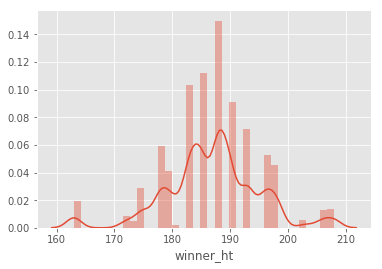

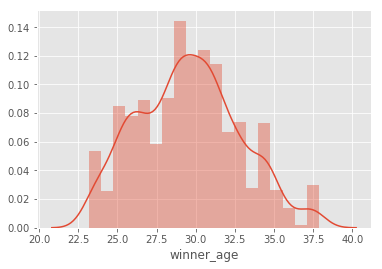

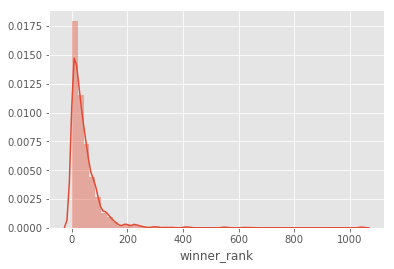

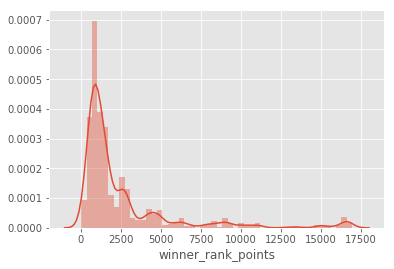

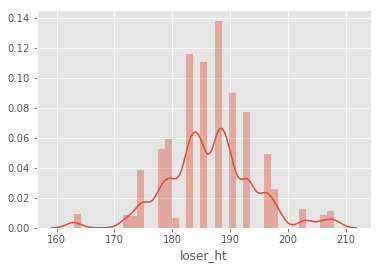

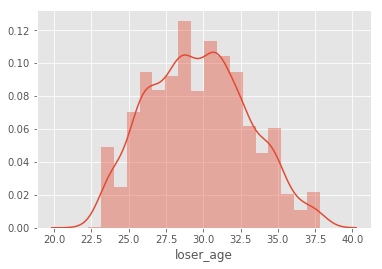

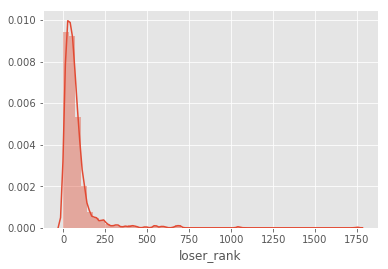

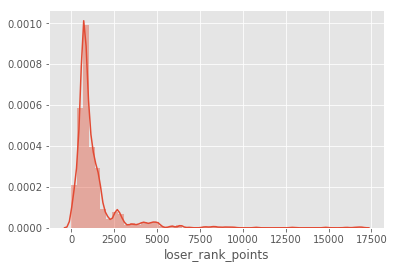

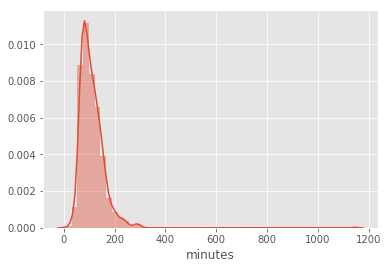

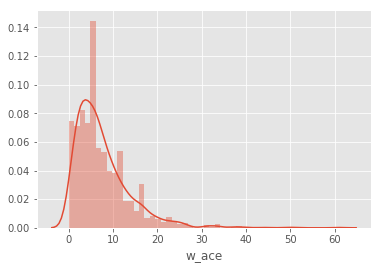

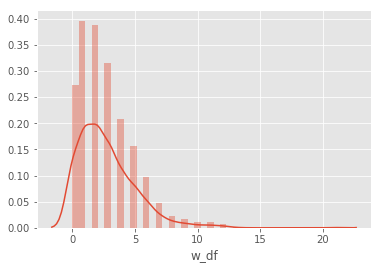

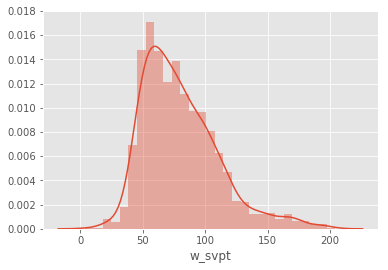

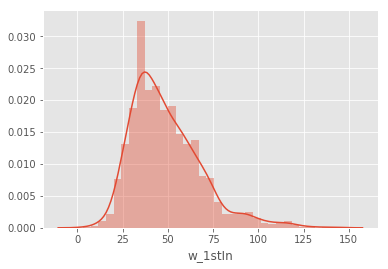

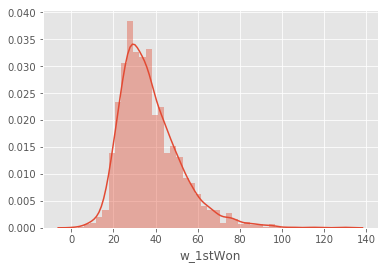

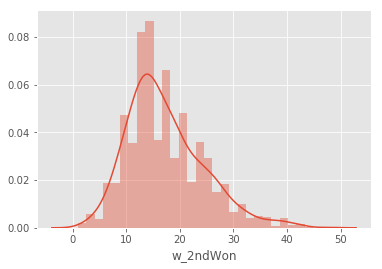

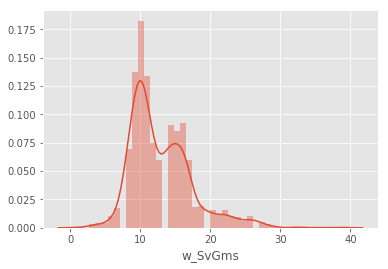

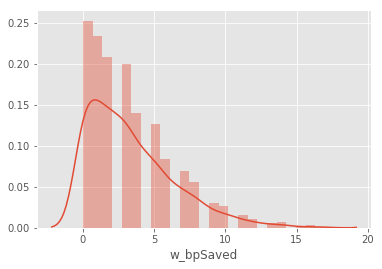

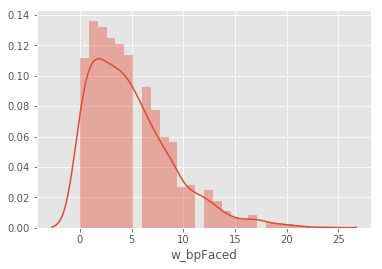

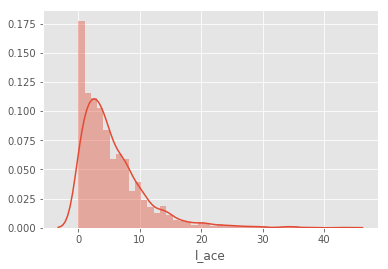

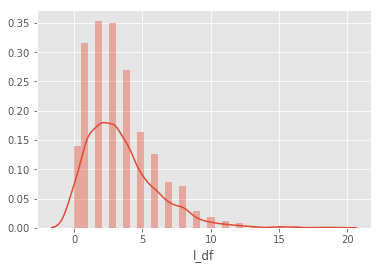

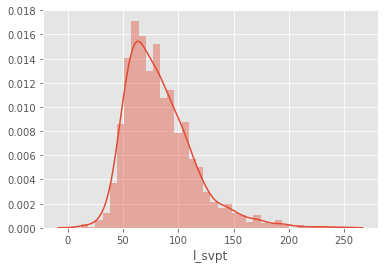

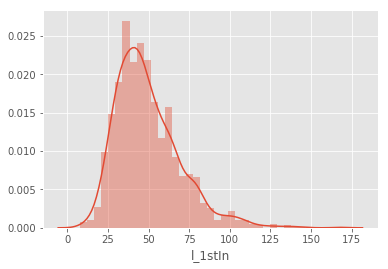

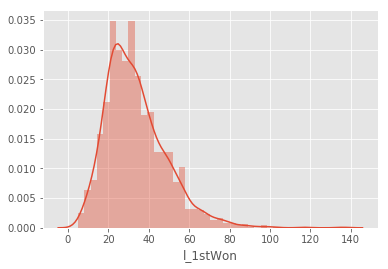

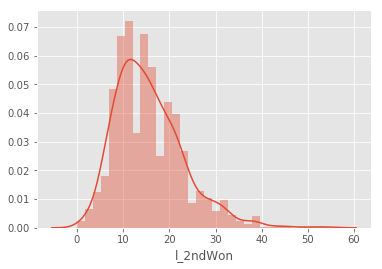

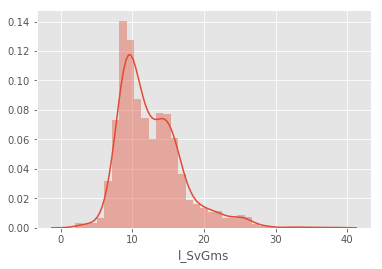

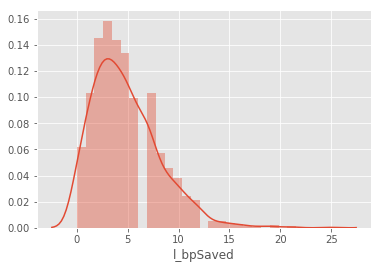

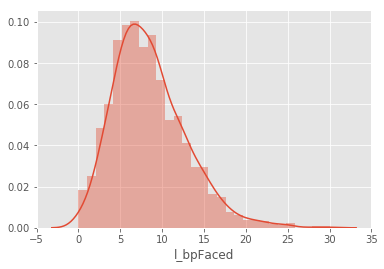

In [15]:
for col in matches_float_sinN.columns:
    plt.figure()
    sns.distplot(matches_float_sinN[col])
    plt.show()

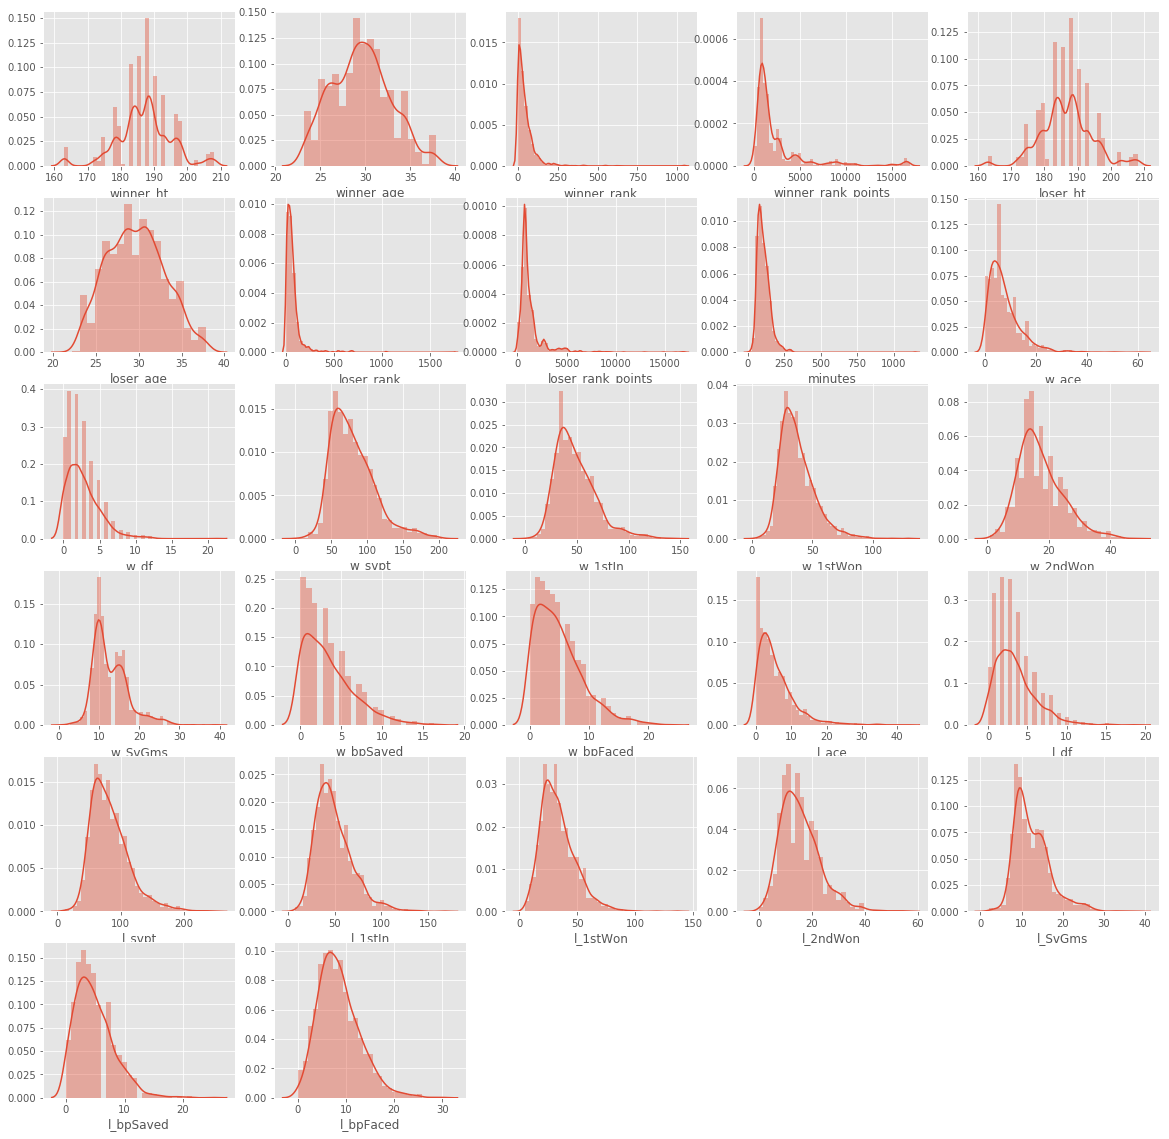

In [16]:
# Voy a visualizar todos en grid:
plt.figure(figsize=(20,20))
for index,col in enumerate(matches_float_sinN.columns):
    plt.subplot(6,5,index+1)
    sns.distplot(matches_float_sinN[col])

#### Tengo que analizar las variables y ver si son normales o tengo que utilizar metricas robustas:

In [17]:
from scipy import stats

In [18]:
matches_float_sinN['minutes'].mean(),matches_float_sinN['minutes'].median()

(110.026525198939, 101.0)

In [19]:
stats.trim_mean(matches_float_sinN['minutes'], 0.05)

106.25773195876289

#### Ahora voy a hacerlo con todas a la vez

In [69]:
for col in matches_float_sinN.columns:
    a = matches_float_sinN[col].mean(),matches_float_sinN[col].median()
    print a

(186.97281167108753, 188.0)
(29.552365027405028, 29.45516769335)
(47.20159151193634, 31.0)
(2503.6750663129974, 1295.0)
(186.59880636604774, 188.0)
(29.678222648271284, 29.57973990415)
(74.62267904509284, 53.0)
(1313.318302387268, 859.0)
(110.026525198939, 101.0)
(7.562997347480106, 6.0)
(2.7334217506631298, 2.0)
(79.93567639257294, 74.0)
(48.97480106100796, 45.0)
(37.40848806366048, 35.0)
(17.26127320954907, 16.0)
(12.911803713527851, 12.0)
(3.3746684350132625, 3.0)
(4.924403183023872, 4.0)
(5.712201591511937, 4.0)
(3.439655172413793, 3.0)
(83.05570291777188, 77.5)
(49.44628647214854, 46.0)
(33.61936339522546, 31.0)
(15.624005305039788, 14.0)
(12.610079575596817, 12.0)
(4.824270557029178, 4.0)
(8.551061007957559, 8.0)


In [88]:
# Tengo que hacer un df con nombre de columna, media y median y reviso los valores

<function index>

#### Para valorarlo correctamente vamos a calcular el percentil en que se situa la media para comprobar si podemos utilizarla

In [55]:
np.percentile(matches_float_sinN['minutes'], 58)

110.0

#### En el caso de minutes la media y la mediana son practicamente iguales, por tanto la media es valida

#### En culquier caso es importante saber si los valores extremos son errores o outliers. Tenemos que testear esos datos:

In [33]:
matches_float_sinN.max(),matches_float_sinN.min()

(winner_ht               208.000000
 winner_age               37.850787
 winner_rank            1042.000000
 winner_rank_points    16950.000000
 loser_ht                208.000000
 loser_age                37.831622
 loser_rank             1751.000000
 loser_rank_points     16950.000000
 minutes                1146.000000
 w_ace                    61.000000
 w_df                     21.000000
 w_svpt                  204.000000
 w_1stIn                 144.000000
 w_1stWon                129.000000
 w_2ndWon                 48.000000
 w_SvGms                  39.000000
 w_bpSaved                17.000000
 w_bpFaced                24.000000
 l_ace                    43.000000
 l_df                     19.000000
 l_svpt                  246.000000
 l_1stIn                 168.000000
 l_1stWon                136.000000
 l_2ndWon                 55.000000
 l_SvGms                  38.000000
 l_bpSaved                25.000000
 l_bpFaced                30.000000
 dtype: float64, winner_ht  

In [36]:
matches_2016[matches_2016['w_ace'] == 61.0].head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
2185,2016-560,Us Open,Hard,128,G,20160829,152,103333,21.0,NaN,Ivo Karlovic,R,208.0,CRO,37.500342,23.0,1570.0,104229,NaN,NaN,Yen Hsun Lu,R,180.0,TPE,33.043121,73.0,720.0,4-6 7-6(4) 6-7(4) 7-6(5) 7-5,5,R128,226.0,61.0,10.0,171.0,116.0,105.0,28.0,29.0,4.0,5.0,15.0,16.0,191.0,102.0,85.0,53.0,29.0,7.0,8.0


In [ ]:
# http://www.atpworldtour.com/en/news/karlovic-smashes-us-open-aces-record

In [37]:
matches_2016[matches_2016['w_df'] == 21.0].head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
174,2016-580,Australian Open,Hard,128,G,20160118,135,104871,30.0,NaN,Jeremy Chardy,R,188.0,FRA,28.930869,31.0,1255.0,105208,NaN,NaN,Ernests Gulbis,R,190.0,LAT,27.383984,79.0,661.0,7-5 2-6 6-7 6-3 13-11,5,R128,283.0,24.0,21.0,195.0,115.0,96.0,31.0,33.0,12.0,17.0,25.0,18.0,234.0,128.0,98.0,46.0,33.0,21.0,28.0


In [ ]:
# http://www.tennislive.net/atp/match/jeremy-chardy-VS-ernests-gulbis/australian-open-melbourne-2016/

In [34]:
# Mirar en w_ace los mayores valores / Menores valores. Hay valores erroneos y outliers

### Seguimos estudiando el data set:

In [8]:
matches_2016.shape

(2941, 49)

In [9]:
matches_2016['surface'].describe()

count     2941
unique       4
top       Hard
freq      1717
Name: surface, dtype: object

In [10]:
matches_2016['tourney_name'].describe()

count        2941
unique        133
top       Us Open
freq          127
Name: tourney_name, dtype: object

#### Viendo el tail y analizando surface y tourney_name (campos que sabemos no tienen Nans), sabemos que el data set tiene unas
#### dimensiones de 49 x 2941

### Elegimos una variable para hacer un estudio:

In [20]:
ht = matches_2016['winner_ht']

In [25]:
Z = matches_2016[[matches_2016['winner_ht']],[matches_2016['winner_age']]]

TypeError: unhashable type: 'list'

In [21]:
ht.dtype

dtype('float64')

In [22]:
ht.describe()

count    2179.000000
mean      186.867370
std         7.931892
min       163.000000
25%       183.000000
50%       188.000000
75%       190.000000
max       208.000000
Name: winner_ht, dtype: float64

#### Por tanto sabemos que hay 762 NaN, diferencia entre los 2941 partidos y los 2179 con valor (count no tiene en cuenta Nans)

In [14]:
ht.sample(10)

2274    163.0
1362    175.0
1861    188.0
2663      NaN
2133    188.0
30      183.0
2400    163.0
1039    178.0
2377      NaN
2529      NaN
Name: winner_ht, dtype: float64

#### Ahora vamos a seleccionar todos aquellos que tengan Nan en winner_ht:

In [15]:
matches_2016[matches_2016['winner_ht'].isnull()].head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
4,2016-M020,Brisbane,Hard,32,A,20160104,296,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,105227,3.0,NaN,Marin Cilic,R,198.0,CRO,27.266256,13.0,2405.0,2-6 7-6(4) 6-4,3,QF,119.0,6.0,0.0,84.0,55.0,41.0,20.0,15.0,0.0,2.0,11.0,2.0,98.0,52.0,41.0,27.0,15.0,7.0,8.0
10,2016-M020,Brisbane,Hard,32,A,20160104,290,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,106045,NaN,NaN,Denis Kudla,R,180.0,USA,23.381246,69.0,719.0,6-3 6-2,3,R16,56.0,7.0,1.0,45.0,33.0,28.0,8.0,9.0,0.0,0.0,0.0,2.0,48.0,27.0,19.0,8.0,8.0,2.0,5.0
11,2016-M020,Brisbane,Hard,32,A,20160104,289,106298,NaN,NaN,Lucas Pouille,R,NaN,FRA,21.861739,78.0,672.0,105676,6.0,NaN,David Goffin,R,163.0,BEL,25.075975,16.0,1880.0,7-6(5) 4-6 6-3,3,R16,122.0,13.0,4.0,106.0,57.0,45.0,24.0,15.0,9.0,11.0,9.0,1.0,92.0,50.0,40.0,20.0,16.0,1.0,4.0
18,2016-M020,Brisbane,Hard,32,A,20160104,280,111202,NaN,NaN,Hyeon Chung,R,NaN,KOR,19.627652,51.0,817.0,105032,NaN,NaN,Samuel Groth,R,NaN,AUS,28.210815,60.0,782.0,7-6(8) 6-4,3,R32,102.0,2.0,3.0,73.0,48.0,35.0,14.0,11.0,2.0,4.0,11.0,3.0,84.0,52.0,39.0,10.0,11.0,8.0,11.0
20,2016-M020,Brisbane,Hard,32,A,20160104,278,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,105902,NaN,WC,James Duckworth,R,183.0,AUS,23.953457,120.0,485.0,3-6 6-4 6-3,3,R32,113.0,4.0,2.0,80.0,48.0,35.0,21.0,14.0,2.0,4.0,14.0,1.0,93.0,42.0,32.0,26.0,14.0,6.0,9.0


In [16]:
df.groupby??

Object `df.groupby` not found.


In [24]:
# Quiero agruparlos pero no funciona. Voy a probar con unique
ht_Nan = matches_2016[matches_2016['winner_ht'].isnull()].groupby('winner_name')

In [30]:
# Por que si no hago groupby me da otro formato? Prueba a hacer con groupby y sin groupby
## ht_Nan = matches_2016[matches_2016['winner_ht'].isnull()]

In [25]:
ht_Nan.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
4,2016-M020,Brisbane,Hard,32,A,20160104,296,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,105227,3.0,NaN,Marin Cilic,R,198.0,CRO,27.266256,13.0,2405.0,2-6 7-6(4) 6-4,3,QF,119.0,6.0,0.0,84.0,55.0,41.0,20.0,15.0,0.0,2.0,11.0,2.0,98.0,52.0,41.0,27.0,15.0,7.0,8.0
10,2016-M020,Brisbane,Hard,32,A,20160104,290,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,106045,NaN,NaN,Denis Kudla,R,180.0,USA,23.381246,69.0,719.0,6-3 6-2,3,R16,56.0,7.0,1.0,45.0,33.0,28.0,8.0,9.0,0.0,0.0,0.0,2.0,48.0,27.0,19.0,8.0,8.0,2.0,5.0
11,2016-M020,Brisbane,Hard,32,A,20160104,289,106298,NaN,NaN,Lucas Pouille,R,NaN,FRA,21.861739,78.0,672.0,105676,6.0,NaN,David Goffin,R,163.0,BEL,25.075975,16.0,1880.0,7-6(5) 4-6 6-3,3,R16,122.0,13.0,4.0,106.0,57.0,45.0,24.0,15.0,9.0,11.0,9.0,1.0,92.0,50.0,40.0,20.0,16.0,1.0,4.0
18,2016-M020,Brisbane,Hard,32,A,20160104,280,111202,NaN,NaN,Hyeon Chung,R,NaN,KOR,19.627652,51.0,817.0,105032,NaN,NaN,Samuel Groth,R,NaN,AUS,28.210815,60.0,782.0,7-6(8) 6-4,3,R32,102.0,2.0,3.0,73.0,48.0,35.0,14.0,11.0,2.0,4.0,11.0,3.0,84.0,52.0,39.0,10.0,11.0,8.0,11.0
20,2016-M020,Brisbane,Hard,32,A,20160104,278,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,105902,NaN,WC,James Duckworth,R,183.0,AUS,23.953457,120.0,485.0,3-6 6-4 6-3,3,R32,113.0,4.0,2.0,80.0,48.0,35.0,21.0,14.0,2.0,4.0,14.0,1.0,93.0,42.0,32.0,26.0,14.0,6.0,9.0
22,2016-M020,Brisbane,Hard,32,A,20160104,276,106298,NaN,NaN,Lucas Pouille,R,NaN,FRA,21.861739,78.0,672.0,106415,NaN,Q,Yoshihito Nishioka,L,NaN,JPN,20.271047,117.0,495.0,4-6 6-3 7-5,3,R32,143.0,17.0,2.0,95.0,64.0,53.0,15.0,16.0,2.0,4.0,4.0,3.0,120.0,64.0,42.0,30.0,15.0,12.0,15.0
29,2016-0891,Chennai,Hard,32,A,20160104,298,106432,8.0,NaN,Borna Coric,R,NaN,CRO,19.137577,44.0,941.0,105379,NaN,NaN,Aljaz Bedene,R,181.0,GBR,26.464066,45.0,939.0,7-6(5) 6-7(5) 6-3,3,SF,176.0,17.0,1.0,134.0,92.0,66.0,20.0,17.0,8.0,11.0,16.0,0.0,106.0,73.0,52.0,17.0,16.0,9.0,13.0
32,2016-0891,Chennai,Hard,32,A,20160104,295,106432,8.0,NaN,Borna Coric,R,NaN,CRO,19.137577,44.0,941.0,105138,4.0,NaN,Roberto Bautista Agut,R,NaN,ESP,27.723477,25.0,1480.0,3-6 6-4 7-6(1),3,QF,150.0,9.0,2.0,97.0,60.0,43.0,21.0,15.0,5.0,8.0,10.0,5.0,113.0,77.0,52.0,15.0,16.0,3.0,6.0
37,2016-0891,Chennai,Hard,32,A,20160104,290,105341,NaN,Q,Thomas Fabbiano,R,NaN,ITA,26.609172,157.0,362.0,104180,6.0,NaN,Gilles Muller,L,193.0,LUX,32.657084,38.0,1105.0,6-4 7-5,3,R16,77.0,0.0,2.0,61.0,43.0,31.0,9.0,11.0,1.0,3.0,14.0,5.0,56.0,38.0,30.0,6.0,11.0,2.0,6.0
38,2016-0891,Chennai,Hard,32,A,20160104,289,106432,8.0,NaN,Borna Coric,R,NaN,CRO,19.137577,44.0,941.0,105572,NaN,NaN,Austin Krajicek,L,NaN,USA,25.552361,104.0,559.0,6-2 7-5,3,R16,90.0,3.0,1.0,53.0,30.0,24.0,19.0,10.0,1.0,1.0,4.0,1.0,69.0,44.0,27.0,13.0,10.0,7.0,10.0


In [26]:
ht_Nan['winner_name'].unique()

winner_name
Adam Pavlasek                            [Adam Pavlasek]
Alexandar Lazarov                    [Alexandar Lazarov]
Alexander Bublik                      [Alexander Bublik]
Alexander Sarkissian              [Alexander Sarkissian]
Alexander Zverev                      [Alexander Zverev]
Alexandre Sidorenko                [Alexandre Sidorenko]
Andrea Arnaboldi                      [Andrea Arnaboldi]
Andrew Whittington                  [Andrew Whittington]
Andrey Rublev                            [Andrey Rublev]
Ante Pavic                                  [Ante Pavic]
Antoine Bellier                        [Antoine Bellier]
Austin Krajicek                        [Austin Krajicek]
Benjamin Hannestad                  [Benjamin Hannestad]
Bjorn Fratangelo                      [Bjorn Fratangelo]
Blaz Rola                                    [Blaz Rola]
Borna Coric                                [Borna Coric]
Calvin Hemery                            [Calvin Hemery]
Carl Soderlund     

In [27]:
ht_Nan['winner_name'].unique().count()

146

#### Hay 146 jugadores. Podemos intentar cruzarlo con otros sets para completar su altura.

### Lo primero que haremos sera comprobar la calidad de los datos: Nans, outliers, etc.

#### Vamos a quitar los Nans del data set

In [4]:
ht2 = ht[np.logical_not(np.isnan(ht))]

In [5]:
ht2.describe()

count    2179.000000
mean      186.867370
std         7.931892
min       163.000000
25%       183.000000
50%       188.000000
75%       190.000000
max       208.000000
Name: winner_ht, dtype: float64

In [6]:
ht2.sample(10)

1219    183.0
1639    185.0
33      181.0
1356    193.0
1565    183.0
2744    190.0
1079    188.0
1697    185.0
1175    183.0
2501    178.0
Name: winner_ht, dtype: float64

In [34]:
ht.nlargest()

1015    208.0
1022    208.0
1288    208.0
1322    208.0
1359    208.0
Name: winner_ht, dtype: float64

In [35]:
matches_2016[matches_2016['winner_ht'] == 208.0].head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
1015,2016-7163,Istanbul,Clay,32,A,20160425,295,103333,3.0,NaN,Ivo Karlovic,R,208.0,CRO,37.155373,31.0,1235.0,104719,5.0,NaN,Marcel Granollers,R,190.0,ESP,30.036961,54.0,871.0,7-6(2) 6-7(5) 6-4,3,QF,133.0,20.0,1.0,103.0,82.0,64.0,13.0,17.0,1.0,1.0,8.0,0.0,89.0,71.0,56.0,16.0,17.0,0.0,1.0
1022,2016-7163,Istanbul,Clay,32,A,20160425,288,103333,3.0,NaN,Ivo Karlovic,R,208.0,CRO,37.155373,31.0,1235.0,105583,NaN,NaN,Dusan Lajovic,R,180.0,SRB,25.820671,69.0,748.0,7-6(11) 7-6(7),3,R16,107.0,13.0,3.0,82.0,52.0,47.0,21.0,12.0,2.0,2.0,11.0,1.0,85.0,65.0,56.0,12.0,12.0,0.0,0.0
1288,2016-520,Roland Garros,Clay,128,G,20160523,160,103333,27.0,NaN,Ivo Karlovic,R,208.0,CRO,37.232033,28.0,1280.0,103656,NaN,NaN,Albert Montanes,R,175.0,ESP,35.488022,98.0,592.0,6-2 7-6(7) 7-6(5),5,R128,108.0,31.0,3.0,93.0,60.0,59.0,19.0,16.0,1.0,2.0,3.0,3.0,104.0,77.0,56.0,15.0,16.0,3.0,6.0
1322,2016-520,Roland Garros,Clay,128,G,20160523,194,103333,27.0,NaN,Ivo Karlovic,R,208.0,CRO,37.232033,28.0,1280.0,111442,NaN,NaN,Jordan Thompson,R,NaN,AUS,22.091718,94.0,608.0,6-7(2) 6-3 7-6(3) 6-7(4) 12-10,5,R64,271.0,41.0,10.0,217.0,145.0,120.0,36.0,34.0,9.0,10.0,12.0,4.0,204.0,132.0,108.0,37.0,33.0,8.0,11.0
1359,2016-M010,s-Hertogenbosch,Grass,32,A,20160606,296,103333,3.0,NaN,Ivo Karlovic,R,208.0,CRO,37.270363,28.0,1360.0,105173,NaN,NaN,Adrian Mannarino,L,183.0,FRA,27.937029,55.0,860.0,6-3 6-4,3,QF,62.0,22.0,4.0,54.0,36.0,33.0,11.0,10.0,3.0,3.0,4.0,5.0,54.0,30.0,24.0,10.0,9.0,4.0,6.0


In [36]:
ht.nsmallest()

21     163.0
162    163.0
214    163.0
240    163.0
476    163.0
Name: winner_ht, dtype: float64

In [37]:
matches_2016.loc[matches_2016['winner_ht'] == 163.0]

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
21,2016-M020,Brisbane,Hard,32,A,20160104,277,105676,6.0,NaN,David Goffin,R,163.0,BEL,25.075975,16.0,1880.0,105064,NaN,NaN,Thomaz Bellucci,L,188.0,BRA,28.013689,37.0,1105.0,6-4 6-4,3,R32,82.0,3.0,4.0,57.0,30.0,23.0,16.0,10.0,1.0,2.0,7.0,2.0,66.0,40.0,25.0,15.0,10.0,7.0,10.0
162,2016-580,Australian Open,Hard,128,G,20160118,123,105676,15.0,NaN,David Goffin,R,163.0,BEL,25.114305,16.0,1835.0,104660,NaN,NaN,Sergiy Stakhovsky,R,193.0,UKR,30.031485,60.0,780.0,3-6 6-3 6-4 6-4,5,R128,156.0,3.0,5.0,115.0,74.0,54.0,18.0,19.0,5.0,10.0,10.0,6.0,123.0,69.0,46.0,24.0,19.0,8.0,15.0
214,2016-580,Australian Open,Hard,128,G,20160118,175,105676,15.0,NaN,David Goffin,R,163.0,BEL,25.114305,16.0,1835.0,106000,NaN,NaN,Damir Dzumhur,R,172.0,BIH,23.663244,81.0,661.0,6-4 0-6 6-4 6-2,5,R64,157.0,7.0,3.0,110.0,63.0,38.0,20.0,17.0,7.0,15.0,3.0,2.0,116.0,71.0,38.0,19.0,17.0,7.0,16.0
240,2016-580,Australian Open,Hard,128,G,20160118,201,105676,15.0,NaN,David Goffin,R,163.0,BEL,25.114305,16.0,1835.0,106233,19.0,NaN,Dominic Thiem,R,NaN,AUT,22.373717,20.0,1645.0,6-1 3-6 7-6 7-5,5,R32,178.0,6.0,8.0,141.0,81.0,62.0,28.0,21.0,9.0,13.0,17.0,6.0,129.0,75.0,50.0,27.0,20.0,6.0,12.0
476,2016-0496,Marseille,Hard,32,A,20160215,287,105676,6.0,NaN,David Goffin,R,163.0,BEL,25.190965,17.0,1970.0,104999,NaN,Q,Mischa Zverev,L,190.0,GER,28.484600,175.0,314.0,6-1 2-0 RET,3,R16,37.0,2.0,0.0,29.0,23.0,17.0,3.0,4.0,3.0,3.0,0.0,1.0,31.0,21.0,9.0,3.0,5.0,3.0,7.0
487,2016-0496,Marseille,Hard,32,A,20160215,273,105676,6.0,NaN,David Goffin,R,163.0,BEL,25.190965,17.0,1970.0,111202,NaN,NaN,Hyeon Chung,R,NaN,KOR,19.742642,69.0,735.0,6-3 6-1,3,R32,61.0,2.0,0.0,38.0,25.0,22.0,11.0,8.0,1.0,1.0,0.0,2.0,60.0,39.0,20.0,12.0,8.0,4.0,8.0
615,2016-M006,Indian Wells Masters,Hard,128,M,20160307,314,105676,15.0,NaN,David Goffin,R,163.0,BEL,25.248460,18.0,1930.0,105227,10.0,NaN,Marin Cilic,R,198.0,CRO,27.438741,12.0,2555.0,7-6(4) 6-2,3,QF,97.0,7.0,5.0,83.0,52.0,39.0,14.0,10.0,11.0,12.0,10.0,1.0,70.0,39.0,24.0,16.0,10.0,3.0,6.0
618,2016-M006,Indian Wells Masters,Hard,128,M,20160307,311,105676,15.0,NaN,David Goffin,R,163.0,BEL,25.248460,18.0,1930.0,104527,3.0,NaN,Stanislas Wawrinka,R,183.0,SUI,30.943190,4.0,6325.0,6-3 5-7 7-6(5),3,R16,145.0,2.0,5.0,109.0,71.0,43.0,19.0,16.0,9.0,15.0,6.0,5.0,107.0,60.0,40.0,20.0,17.0,4.0,11.0
639,2016-M006,Indian Wells Masters,Hard,128,M,20160307,290,105676,15.0,NaN,David Goffin,R,163.0,BEL,25.248460,18.0,1930.0,105550,NaN,NaN,Guido Pella,L,NaN,ARG,25.806982,40.0,1018.0,4-6 6-3 6-2,3,R32,130.0,4.0,3.0,90.0,53.0,43.0,17.0,14.0,6.0,8.0,7.0,10.0,106.0,65.0,40.0,19.0,13.0,14.0,18.0
661,2016-M006,Indian Wells Masters,Hard,128,M,20160307,268,105676,15.0,NaN,David Goffin,R,163.0,BEL,25.248460,18.0,1930.0,126207,NaN,WC,Francis Tiafoe,R,NaN,USA,18.127310,177.0,309.0,3-6 6-3 7-6(2),3,R64,134.0,4.0,5.0,103.0,59.0,42.0,24.0,15.0,7.0,10.0,7.0,4.0,97.0,54.0,39.0,19.0,15.0,8.0,11.0


### Una de las comprobaciones que debemos hacer es si la variables siguen una distribucion normal:

<function matplotlib.pyplot.show>

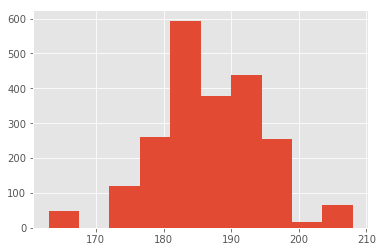

In [38]:
plt.hist(ht2)
plt.show

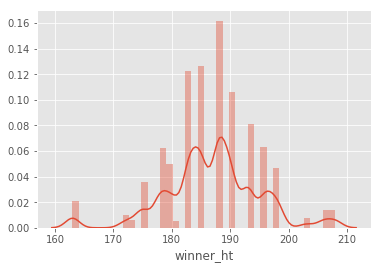

In [12]:
sns.distplot(ht2)
plt.show()

#### Parece una distribucion mas o menos normal

In [48]:
ht2.mean(),ht2.std()

(186.8673703533731, 7.9318918416343305)

#### Vamos a probar a Estandarizar la variable ( Xe = (x - x^) / std

In [42]:
# En pandas no existe reduce, por tanto utilizaremos apply
# count = ht2.reduce(lambda x,y: x+y)
# mean = ht2.reduce(lambda x,y: x+y)/count

AttributeError: 'Series' object has no attribute 'reduce'

In [49]:
ht2_mean = ht2.mean()
ht2_std = ht2.std() 
ht2_estandar = ht2.apply(lambda x: (x - ht2_mean)/ht2_std)

<function matplotlib.pyplot.show>

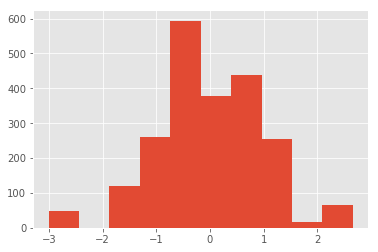

In [50]:
plt.hist(ht2_estandar)
plt.show

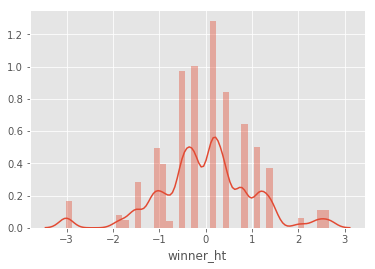

In [51]:
sns.distplot(ht2_estandar)
plt.show()

#### La mayor parte de los valores esta entre la media y 2 std por tanto dentro del intervalo de confianza del 95%

### Vamos a hacer una prueba de la relacion entre dos variables:

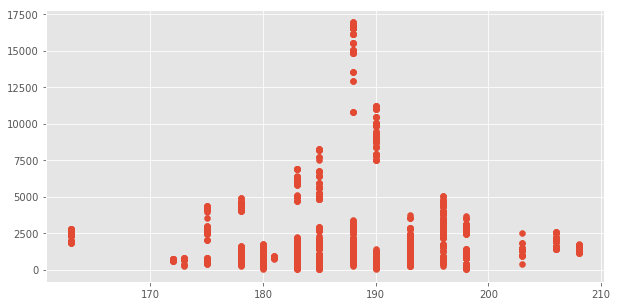

In [21]:
f, ax = plt.subplots(figsize=(10,5))
plt.scatter(matches_2016['winner_ht'], matches_2016['winner_rank_points'])

In [66]:
### Probamos otra grafica:

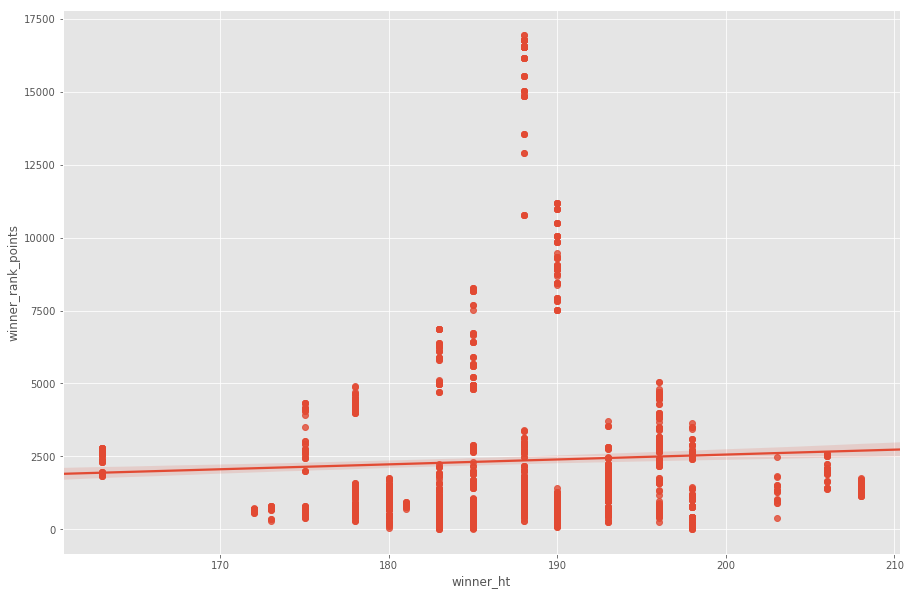

In [65]:
plt.figure(figsize=(15,10))
sns.regplot(matches_2016['winner_ht'], 
                          matches_2016['winner_rank_points'])
plt.show()

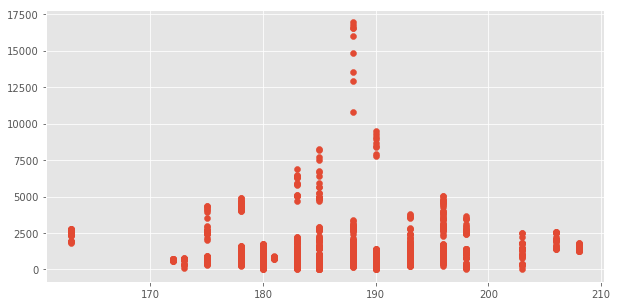

In [22]:
f, ax = plt.subplots(figsize=(10,5))
plt.scatter(matches_2016['loser_ht'], matches_2016['loser_rank_points'])

In [67]:
## Probamos con otras variables que puedan estar un poco mas correlacinadas:

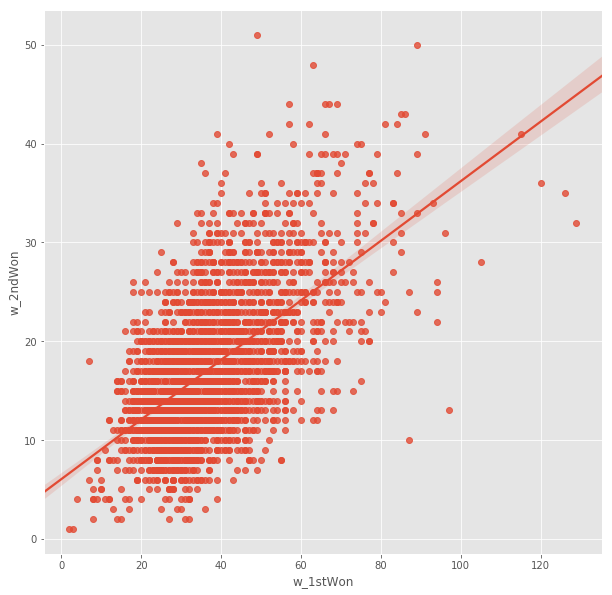

In [69]:
plt.figure(figsize=(10,10))
sns.regplot(matches_2016['w_1stWon'], 
                          matches_2016['w_2ndWon'])
plt.show()

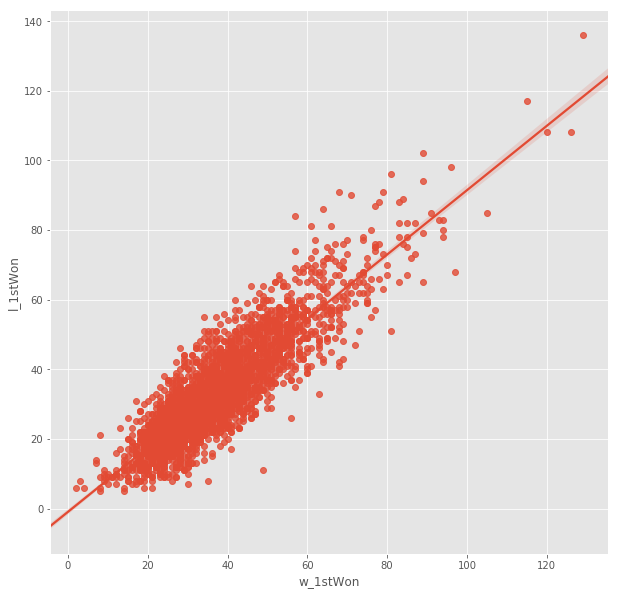

In [70]:
plt.figure(figsize=(10,10))
sns.regplot(matches_2016['w_1stWon'], 
                          matches_2016['l_1stWon'])
plt.show()

### Vamos a seguir los pasos con otra variable

In [52]:
age = matches_2016['winner_age']
age.dtype
age.describe()

count    2935.000000
mean       27.957526
std         4.213122
min        17.188227
25%        25.267625
50%        28.249144
75%        30.888433
max        37.850787
Name: winner_age, dtype: float64

#### Hay 6 NaNs

In [53]:
matches_2016[matches_2016['winner_age'].isnull()].head(6)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
2762,2016-M-DC-2016-G2-AM-M-PER-MEX,Davis Cup G2 R2: PER vs MEX,Clay,4,D,20160715,2,126190,NaN,NaN,Nicolas Alvarez,R,NaN,PER,NaN,NaN,NaN,106412,NaN,NaN,Lucas Gomez,U,NaN,MEX,20.917180,530.0,66.0,6-3 6-4 6-3,5,RR,114.0,8.0,2.0,73.0,50.0,41.0,15.0,14.0,3.0,4.0,4.0,3.0,79.0,44.0,31.0,17.0,14.0,4.0,9.0
2764,2016-M-DC-2016-G2-AM-M-PER-MEX,Davis Cup G2 R2: PER vs MEX,Clay,4,D,20160715,5,126190,NaN,NaN,Nicolas Alvarez,R,NaN,PER,NaN,NaN,NaN,106250,NaN,NaN,Luis Patino,R,NaN,MEX,22.762491,780.0,25.0,6-4 6-7(2) 6-3,3,RR,169.0,3.0,2.0,106.0,69.0,39.0,26.0,16.0,11.0,13.0,1.0,3.0,116.0,65.0,34.0,32.0,15.0,10.0,15.0
2766,2016-M-DC-2016-G2-AM-M-PER-VEN-01,Davis Cup G2 R3: PER vs VEN,Clay,4,D,20160916,2,126190,NaN,NaN,Nicolas Alvarez,R,NaN,PER,NaN,NaN,NaN,106175,NaN,NaN,Ricardo Rodriguez,R,NaN,VEN,23.375770,686.0,36.0,6-4 6-2 6-0,5,RR,135.0,5.0,3.0,74.0,47.0,36.0,15.0,12.0,6.0,8.0,0.0,1.0,82.0,64.0,29.0,6.0,12.0,3.0,11.0
2768,2016-M-DC-2016-G2-AM-M-PER-VEN-01,Davis Cup G2 R3: PER vs VEN,Clay,4,D,20160916,5,126190,NaN,NaN,Nicolas Alvarez,R,NaN,PER,NaN,NaN,NaN,105334,NaN,NaN,Luis David Martinez,U,NaN,VEN,27.337440,740.0,29.0,4-6 6-4 7-6(2) 6-1,5,RR,NaN,11.0,4.0,154.0,100.0,68.0,27.0,20.0,12.0,14.0,8.0,4.0,117.0,67.0,42.0,29.0,19.0,3.0,8.0
2769,2016-M-DC-2016-G2-AM-M-PUR-ESA-01,Davis Cup G2 R1: PUR vs ESA,Hard,4,D,20160304,1,200619,NaN,NaN,Sebastian Arcila,NaN,NaN,PUR,NaN,NaN,NaN,108763,NaN,NaN,Alberto Emmanuel Alvarado Larin,U,NaN,ESA,21.245722,NaN,NaN,6-4 6-4 6-2,3,RR,108.0,0.0,3.0,80.0,61.0,44.0,11.0,14.0,4.0,6.0,1.0,7.0,107.0,67.0,36.0,20.0,14.0,7.0,13.0
2772,2016-M-DC-2016-G2-AM-M-PUR-ESA-01,Davis Cup G2 R1: PUR vs ESA,Hard,4,D,20160304,5,200620,NaN,NaN,Ignacio Garcia,NaN,NaN,PUR,NaN,NaN,NaN,144771,NaN,NaN,Sebastian Quiros,NaN,NaN,ESA,17.949350,1774.0,1.0,6-1 6-2,3,RR,62.0,2.0,4.0,50.0,25.0,17.0,18.0,8.0,5.0,5.0,4.0,4.0,52.0,26.0,17.0,5.0,7.0,5.0,10.0


#### Aqui no va a hacer falta hacer un groupby para saber cuantos jugadores distintos. Son todos partidos de Davies, deberiamos comprobar la calidad de estos partidos. Dado que no es una competicion individual, sino por paises probablemente la saquemos del estudio.

#### Vamos a quitar los NaNs del dataset antes de examinarlo:

In [54]:
age2 = age[np.logical_not(np.isnan(age))]

In [55]:
age2.describe()

count    2935.000000
mean       27.957526
std         4.213122
min        17.188227
25%        25.267625
50%        28.249144
75%        30.888433
max        37.850787
Name: winner_age, dtype: float64

<function matplotlib.pyplot.show>

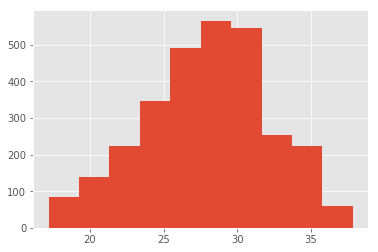

In [56]:
plt.hist(age2)
plt.show

In [57]:
(age2.mean(),age2.std())

(27.957525533256245, 4.213121906556134)

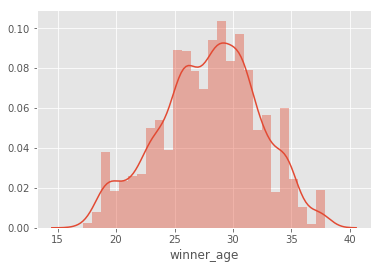

In [58]:
sns.distplot(age2)
plt.show()

#### Evidentemente la distribución no es totalmente normal. A partir de una edad el rendimiento de los tenistas disminuye bruscamente y se retiran. La entrada de nuevos tenistas es mucho más escalonada

#### Estandarizamos:

In [57]:
age2_mean = age2.mean()
age2_std = age2.std() 
age2_estandar = age2.apply(lambda x: (x - age2_mean)/age2_std)

<function matplotlib.pyplot.show>

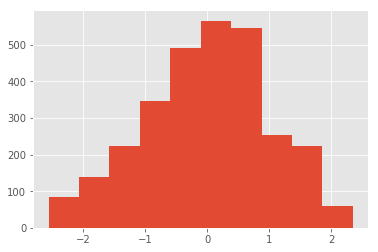

In [58]:
plt.hist(age2_estandar)
plt.show

## Ahora vamos a construir nuevas variables:

In [114]:
score = matches_2016['score']

In [115]:
score.head()

0           6-4 6-4
1           6-1 6-4
2     7-6(5) 7-6(5)
3    6-4 6-7(4) 6-4
4    2-6 7-6(4) 6-4
Name: score, dtype: object

In [61]:
score.dtype

dtype('O')

#### El dtype 'O' significa que los elementos son de varios tipos. Debería convertir todos a str y separalo

#### Prueba 1:

In [63]:
new_score = score.apply(lambda x: x.split(' '))

In [64]:
new_score.head()

0            [6-4, 6-4]
1            [6-1, 6-4]
2      [7-6(5), 7-6(5)]
3    [6-4, 6-7(4), 6-4]
4    [2-6, 7-6(4), 6-4]
Name: score, dtype: object

In [119]:
new_score.dtype

dtype('O')

In [80]:
new_score.iloc[0]

['6-4', '6-4']

In [81]:
new_score.iloc[0][0]

'6-4'

In [97]:
new_score.iloc[2][1]

'7-6(5)'

In [82]:
## Es una lista de listas.

In [99]:
new_score['s1_w'] = new_score.apply(lambda x: x[0][0])
new_score['s1_w'].head()

0    6
1    6
2    7
3    6
4    2
Name: score, dtype: object

In [103]:
# Esto no funciona. No utilizar, busco otro metodo
new_score['s1_L'] = new_score.apply(lambda x: x[0][1])
new_score['s1_L'].head()

IndexError: string index out of range

#### Prueba 2:

In [125]:
score_str = score.astype(str)

In [126]:
score_str.head()

0           6-4 6-4
1           6-1 6-4
2     7-6(5) 7-6(5)
3    6-4 6-7(4) 6-4
4    2-6 7-6(4) 6-4
Name: score, dtype: object

In [133]:
score_str[0][0], score_str[0][1], score_str[0][2], score_str[0][3], score_str[0][4], score_str[0][5], score_str[0][6]

('6', '-', '4', ' ', '6', '-', '4')

In [134]:
score_str[2][0], score_str[2][1], score_str[2][2], score_str[2][3], score_str[2][4], score_str[2][5], score_str[2][6]

('7', '-', '6', '(', '5', ')', ' ')

In [154]:
score_str.str.split(' ')[2][0]

'7-6(5)'

##### PRUEBA 3. OK!

In [175]:
matches_2016['s1'], matches_2016['sResto'] = matches_2016['score'].str.split(' ', 1).str
matches_2016.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,s1,sResto
0,2016-M020,Brisbane,Hard,32,A,20160104,300,105683,4.0,NaN,Milos Raonic,R,196.0,CAN,25.021218,14.0,2170.0,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,6-4 6-4,3,F,87.0,6.0,6.0,60.0,34.0,28.0,14.0,10.0,1.0,1.0,7.0,3.0,61.0,34.0,25.0,14.0,10.0,3.0,5.0,6-4,6-4
1,2016-M020,Brisbane,Hard,32,A,20160104,299,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,6-1 6-4,3,SF,60.0,6.0,0.0,49.0,27.0,23.0,12.0,9.0,0.0,1.0,2.0,4.0,55.0,31.0,18.0,9.0,8.0,2.0,6.0,6-1,6-4
2,2016-M020,Brisbane,Hard,32,A,20160104,298,105683,4.0,NaN,Milos Raonic,R,196.0,CAN,25.021218,14.0,2170.0,106071,7.0,NaN,Bernard Tomic,R,193.0,AUS,23.203285,18.0,1675.0,7-6(5) 7-6(5),3,SF,107.0,13.0,3.0,79.0,49.0,40.0,19.0,12.0,4.0,4.0,10.0,3.0,84.0,54.0,41.0,16.0,12.0,2.0,2.0,7-6(5),7-6(5)
3,2016-M020,Brisbane,Hard,32,A,20160104,297,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,105777,NaN,NaN,Grigor Dimitrov,R,188.0,BUL,24.637919,28.0,1360.0,6-4 6-7(4) 6-4,3,QF,127.0,7.0,1.0,83.0,52.0,45.0,19.0,16.0,0.0,1.0,8.0,2.0,104.0,62.0,46.0,21.0,16.0,8.0,11.0,6-4,6-7(4) 6-4
4,2016-M020,Brisbane,Hard,32,A,20160104,296,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,105227,3.0,NaN,Marin Cilic,R,198.0,CRO,27.266256,13.0,2405.0,2-6 7-6(4) 6-4,3,QF,119.0,6.0,0.0,84.0,55.0,41.0,20.0,15.0,0.0,2.0,11.0,2.0,98.0,52.0,41.0,27.0,15.0,7.0,8.0,2-6,7-6(4) 6-4


In [176]:
matches_2016['s2'], matches_2016['sResto'] = matches_2016['sResto'].str.split(' ', 1).str
matches_2016.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,s1,sResto,s2
0,2016-M020,Brisbane,Hard,32,A,20160104,300,105683,4.0,NaN,Milos Raonic,R,196.0,CAN,25.021218,14.0,2170.0,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,6-4 6-4,3,F,87.0,6.0,6.0,60.0,34.0,28.0,14.0,10.0,1.0,1.0,7.0,3.0,61.0,34.0,25.0,14.0,10.0,3.0,5.0,6-4,NaN,6-4
1,2016-M020,Brisbane,Hard,32,A,20160104,299,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,6-1 6-4,3,SF,60.0,6.0,0.0,49.0,27.0,23.0,12.0,9.0,0.0,1.0,2.0,4.0,55.0,31.0,18.0,9.0,8.0,2.0,6.0,6-1,NaN,6-4
2,2016-M020,Brisbane,Hard,32,A,20160104,298,105683,4.0,NaN,Milos Raonic,R,196.0,CAN,25.021218,14.0,2170.0,106071,7.0,NaN,Bernard Tomic,R,193.0,AUS,23.203285,18.0,1675.0,7-6(5) 7-6(5),3,SF,107.0,13.0,3.0,79.0,49.0,40.0,19.0,12.0,4.0,4.0,10.0,3.0,84.0,54.0,41.0,16.0,12.0,2.0,2.0,7-6(5),NaN,7-6(5)
3,2016-M020,Brisbane,Hard,32,A,20160104,297,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,105777,NaN,NaN,Grigor Dimitrov,R,188.0,BUL,24.637919,28.0,1360.0,6-4 6-7(4) 6-4,3,QF,127.0,7.0,1.0,83.0,52.0,45.0,19.0,16.0,0.0,1.0,8.0,2.0,104.0,62.0,46.0,21.0,16.0,8.0,11.0,6-4,6-4,6-7(4)
4,2016-M020,Brisbane,Hard,32,A,20160104,296,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,105227,3.0,NaN,Marin Cilic,R,198.0,CRO,27.266256,13.0,2405.0,2-6 7-6(4) 6-4,3,QF,119.0,6.0,0.0,84.0,55.0,41.0,20.0,15.0,0.0,2.0,11.0,2.0,98.0,52.0,41.0,27.0,15.0,7.0,8.0,2-6,6-4,7-6(4)


In [177]:
matches_2016['s3'], matches_2016['sResto'] = matches_2016['sResto'].str.split(' ', 1).str
matches_2016.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,s1,sResto,s2,s3
0,2016-M020,Brisbane,Hard,32,A,20160104,300,105683,4.0,NaN,Milos Raonic,R,196.0,CAN,25.021218,14.0,2170.0,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,6-4 6-4,3,F,87.0,6.0,6.0,60.0,34.0,28.0,14.0,10.0,1.0,1.0,7.0,3.0,61.0,34.0,25.0,14.0,10.0,3.0,5.0,6-4,NaN,6-4,NaN
1,2016-M020,Brisbane,Hard,32,A,20160104,299,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,6-1 6-4,3,SF,60.0,6.0,0.0,49.0,27.0,23.0,12.0,9.0,0.0,1.0,2.0,4.0,55.0,31.0,18.0,9.0,8.0,2.0,6.0,6-1,NaN,6-4,NaN
2,2016-M020,Brisbane,Hard,32,A,20160104,298,105683,4.0,NaN,Milos Raonic,R,196.0,CAN,25.021218,14.0,2170.0,106071,7.0,NaN,Bernard Tomic,R,193.0,AUS,23.203285,18.0,1675.0,7-6(5) 7-6(5),3,SF,107.0,13.0,3.0,79.0,49.0,40.0,19.0,12.0,4.0,4.0,10.0,3.0,84.0,54.0,41.0,16.0,12.0,2.0,2.0,7-6(5),NaN,7-6(5),NaN
3,2016-M020,Brisbane,Hard,32,A,20160104,297,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,105777,NaN,NaN,Grigor Dimitrov,R,188.0,BUL,24.637919,28.0,1360.0,6-4 6-7(4) 6-4,3,QF,127.0,7.0,1.0,83.0,52.0,45.0,19.0,16.0,0.0,1.0,8.0,2.0,104.0,62.0,46.0,21.0,16.0,8.0,11.0,6-4,NaN,6-7(4),6-4
4,2016-M020,Brisbane,Hard,32,A,20160104,296,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,105227,3.0,NaN,Marin Cilic,R,198.0,CRO,27.266256,13.0,2405.0,2-6 7-6(4) 6-4,3,QF,119.0,6.0,0.0,84.0,55.0,41.0,20.0,15.0,0.0,2.0,11.0,2.0,98.0,52.0,41.0,27.0,15.0,7.0,8.0,2-6,NaN,7-6(4),6-4


##### Los Grand Slam tienen 5 sets, pot tanto hay que separar hasta 5 sets. Despues habra que dividir cad uno en 2, los juegos del ganador y del perdedor.

In [180]:
matches_2016.shape

(2941, 53)

In [178]:
matches_2016['sResto'].describe()

count     382
unique    103
top       6-4
freq       48
Name: sResto, dtype: object

In [181]:
matches_2016['s4'], matches_2016['sResto'] = matches_2016['sResto'].str.split(' ', 1).str
matches_2016.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,s1,sResto,s2,s3,s4
0,2016-M020,Brisbane,Hard,32,A,20160104,300,105683,4.0,NaN,Milos Raonic,R,196.0,CAN,25.021218,14.0,2170.0,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,6-4 6-4,3,F,87.0,6.0,6.0,60.0,34.0,28.0,14.0,10.0,1.0,1.0,7.0,3.0,61.0,34.0,25.0,14.0,10.0,3.0,5.0,6-4,NaN,6-4,NaN,NaN
1,2016-M020,Brisbane,Hard,32,A,20160104,299,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,6-1 6-4,3,SF,60.0,6.0,0.0,49.0,27.0,23.0,12.0,9.0,0.0,1.0,2.0,4.0,55.0,31.0,18.0,9.0,8.0,2.0,6.0,6-1,NaN,6-4,NaN,NaN
2,2016-M020,Brisbane,Hard,32,A,20160104,298,105683,4.0,NaN,Milos Raonic,R,196.0,CAN,25.021218,14.0,2170.0,106071,7.0,NaN,Bernard Tomic,R,193.0,AUS,23.203285,18.0,1675.0,7-6(5) 7-6(5),3,SF,107.0,13.0,3.0,79.0,49.0,40.0,19.0,12.0,4.0,4.0,10.0,3.0,84.0,54.0,41.0,16.0,12.0,2.0,2.0,7-6(5),NaN,7-6(5),NaN,NaN
3,2016-M020,Brisbane,Hard,32,A,20160104,297,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,105777,NaN,NaN,Grigor Dimitrov,R,188.0,BUL,24.637919,28.0,1360.0,6-4 6-7(4) 6-4,3,QF,127.0,7.0,1.0,83.0,52.0,45.0,19.0,16.0,0.0,1.0,8.0,2.0,104.0,62.0,46.0,21.0,16.0,8.0,11.0,6-4,NaN,6-7(4),6-4,NaN
4,2016-M020,Brisbane,Hard,32,A,20160104,296,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,105227,3.0,NaN,Marin Cilic,R,198.0,CRO,27.266256,13.0,2405.0,2-6 7-6(4) 6-4,3,QF,119.0,6.0,0.0,84.0,55.0,41.0,20.0,15.0,0.0,2.0,11.0,2.0,98.0,52.0,41.0,27.0,15.0,7.0,8.0,2-6,NaN,7-6(4),6-4,NaN


In [182]:
matches_2016['sResto'].describe()

count     135
unique     24
top       6-4
freq       31
Name: sResto, dtype: object

In [183]:
matches_2016['s5'], matches_2016['sResto'] = matches_2016['sResto'].str.split(' ', 1).str
matches_2016.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,s1,sResto,s2,s3,s4,s5
0,2016-M020,Brisbane,Hard,32,A,20160104,300,105683,4.0,NaN,Milos Raonic,R,196.0,CAN,25.021218,14.0,2170.0,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,6-4 6-4,3,F,87.0,6.0,6.0,60.0,34.0,28.0,14.0,10.0,1.0,1.0,7.0,3.0,61.0,34.0,25.0,14.0,10.0,3.0,5.0,6-4,NaN,6-4,NaN,NaN,NaN
1,2016-M020,Brisbane,Hard,32,A,20160104,299,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,6-1 6-4,3,SF,60.0,6.0,0.0,49.0,27.0,23.0,12.0,9.0,0.0,1.0,2.0,4.0,55.0,31.0,18.0,9.0,8.0,2.0,6.0,6-1,NaN,6-4,NaN,NaN,NaN
2,2016-M020,Brisbane,Hard,32,A,20160104,298,105683,4.0,NaN,Milos Raonic,R,196.0,CAN,25.021218,14.0,2170.0,106071,7.0,NaN,Bernard Tomic,R,193.0,AUS,23.203285,18.0,1675.0,7-6(5) 7-6(5),3,SF,107.0,13.0,3.0,79.0,49.0,40.0,19.0,12.0,4.0,4.0,10.0,3.0,84.0,54.0,41.0,16.0,12.0,2.0,2.0,7-6(5),NaN,7-6(5),NaN,NaN,NaN
3,2016-M020,Brisbane,Hard,32,A,20160104,297,103819,1.0,NaN,Roger Federer,R,185.0,SUI,34.406571,3.0,8265.0,105777,NaN,NaN,Grigor Dimitrov,R,188.0,BUL,24.637919,28.0,1360.0,6-4 6-7(4) 6-4,3,QF,127.0,7.0,1.0,83.0,52.0,45.0,19.0,16.0,0.0,1.0,8.0,2.0,104.0,62.0,46.0,21.0,16.0,8.0,11.0,6-4,NaN,6-7(4),6-4,NaN,NaN
4,2016-M020,Brisbane,Hard,32,A,20160104,296,106233,8.0,NaN,Dominic Thiem,R,NaN,AUT,22.335387,20.0,1600.0,105227,3.0,NaN,Marin Cilic,R,198.0,CRO,27.266256,13.0,2405.0,2-6 7-6(4) 6-4,3,QF,119.0,6.0,0.0,84.0,55.0,41.0,20.0,15.0,0.0,2.0,11.0,2.0,98.0,52.0,41.0,27.0,15.0,7.0,8.0,2-6,NaN,7-6(4),6-4,NaN,NaN


In [184]:
matches_2016['sResto'].describe()

count       4
unique      1
top       RET
freq        4
Name: sResto, dtype: object

#### ¿Por qué cuenta 4?